In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [109]:
# 높을수록 False, 낮을수록 True
target_cols_direction = [False, True, 'center', True,]

In [110]:
target_cols_ratio = [4, 4, 3, 3]

In [111]:
target_cols_kde = ['신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde', '요소질소 (BUN)_kde', '상복부초음파_scaling',
                  ]

In [24]:
csv_path = './output/배출기능_노폐물배설.csv'

In [25]:
model_path_man = './model/0501_man.pkl'

In [26]:
model_path_woman = './model/0501_woman.pkl'

In [27]:
# 결측치
fill_th = 1
fill_th_score = 90

# 이상소견 Load

In [28]:
# with open('../input/TEST_갑상선이상소견추출241127.json', encoding='utf-8') as f:
with open('../input/DM_기능나이_장비검사_이상소견241210.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw_text = pd.DataFrame(js)

In [29]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131105 entries, 0 to 1131104
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
dtypes: int64(3), object(6)
memory usage: 77.7+ MB


In [30]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [31]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)
0,2022,242726,974419,None,None,None,None,없음,정상
1,2022,242726,1354580,None,None,None,None,없음,정상
2,2022,242726,2513468,None,None,None,None,없음,정상
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검
4,2022,242728,993356,None,None,None,없음,없음,None


In [32]:
len(raw_text)

1131105

In [33]:
raw_text = raw_text.drop_duplicates(subset=['검진년도', 'UID', 'CU_REC_ID'], keep='first')

In [34]:
len(raw_text)

1131105

In [35]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [36]:
raw_text_real = raw_text.copy()

## 상복부초음파 Data Load

In [37]:
score_text = '상복부초음파 (Abdominal Sono)'
score_text_real = '상복부초음파'

In [38]:
raw_text = raw_text_real.copy()

In [39]:
raw_text.rename(columns={score_text:score_text + '_text'}, inplace=True)

In [40]:
raw_text['std_str'] = raw_text[score_text + '_text'].str.replace(' ', '')

In [41]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   검진년도                          1131105 non-null  int64 
 1   UID                           1131105 non-null  int64 
 2   CU_REC_ID                     1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object
 5   대장내시경                         193596 non-null   object
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object
 7   심전도                           1030430 non-null  object
 8   위내시경 (Endo)                   829744 non-null   object
 9   std_str                       788807 non-null   object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [42]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상
4,2022,242728,993356,None,None,None,없음,없음,None,없음
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",신장낭종
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,지방간
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상
...,...,...,...,...,...,...,...,...,...,...
1131080,2024,1494452,3016416,없음,None,None,없음,없음,None,없음
1131083,2024,1494460,3016622,None,None,None,지방간,None,None,지방간
1131094,2024,1494496,3019430,None,None,대장용종,지방간,없음,"만성위축성위염,장상피화생",지방간
1131095,2024,1494500,3019508,갑상선낭종,None,None,없음,없음,"역류성식도염,미란성위염",없음


## 라벨링 데이터 join

In [43]:
raw_text_labeling = pd.read_excel('../input/' + score_text_real +'.xlsx')

In [44]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity,kidney
0,상복부초음파 (Abdominal Sono),지방간,125777.0,지방간,['지방간$'],1.0,0.0,지방간,3.0,0
1,상복부초음파 (Abdominal Sono),담낭 용종,86346.0,담낭용종,"['담낭%', '용종$']",1.0,0.0,담낭용종,2.0,0
2,상복부초음파 (Abdominal Sono),신장 낭종,59376.0,신장낭종,"['신장%', '낭종$']",1.0,0.0,신장낭종,1.0,0
3,상복부초음파 (Abdominal Sono),간 낭종,54920.0,간낭종,"['간%', '낭종$']",1.0,0.0,간낭종,1.0,0
4,상복부초음파 (Abdominal Sono),없음,23450.0,없음,['없음$'],1.0,0.0,없음,0.0,0


In [45]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cate        6669 non-null   object 
 1   label       6669 non-null   object 
 2   cnt         6668 non-null   float64
 3   strip       6662 non-null   object 
 4   standard    6662 non-null   object 
 5   flag        6662 non-null   float64
 6   error_flag  6662 non-null   float64
 7   std_str     6669 non-null   object 
 8   severity    4834 non-null   float64
 9   kidney      6669 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 521.1+ KB


## 콩팥소견만 포함

In [46]:
len(raw_text_labeling)

6669

In [47]:
raw_text_labeling = raw_text_labeling[raw_text_labeling['kidney'] == 1]

In [48]:
len(raw_text_labeling)

1760

In [49]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
10,신장결석,4.0
15,신장결석의심,4.0
17,신장낭종의심,1.0
25,신장석회화낭종,5.0
31,신장석회화의심,5.0
...,...,...
6179,중복요관,NaN
6444,췌장수신증의심,3.0
6599,폐쇄성수신증,3.0
6621,합병성신장낭종의심,1.0


In [50]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str     severity
다낭성신장질환의심   5.0         6
만성신장질환의심    5.0         5
신장벽석회화낭종    5.0         5
신장혈관근지방종의심  2.0         5
신장수질석회화의심   5.0         5
신장석회화낭종의심   5.0         5
우측합병성신장낭종   1.0         4
신장결석의심      4.0         4
신장실질에코증가    5.0         4
신장낭종의심      1.0         4
dtype: int64

In [51]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 10 to 6668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   std_str   1414 non-null   object 
 1   severity  966 non-null    float64
dtypes: float64(1), object(1)
memory usage: 33.1+ KB


In [52]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [53]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      30097 non-null    float64
dtypes: float64(1), int64(3), object(7)
memory usage: 103.6+ MB


In [54]:
raw_text[raw_text[score_text + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,없음,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",신장낭종,1.0
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,지방간,NaN
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,NaN


In [55]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [56]:
raw_text['severity2'] = raw_text[score_text + '_text'].apply(max_value)

In [57]:
raw_text[raw_text[score_text + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity,severity2
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상,NaN,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,없음,NaN,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",신장낭종,1.0,NaN
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,지방간,NaN,NaN
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,NaN,NaN


In [58]:
raw_text['severity'].value_counts()

1.0     17900
5.0      8395
4.0      2916
2.0       542
3.0       286
10.0       58
Name: severity, dtype: int64

In [59]:
raw_text['severity2'].value_counts()

1.0     44779
5.0     18566
4.0     10161
2.0      1444
3.0       607
10.0      180
0.0        68
Name: severity2, dtype: int64

In [60]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      30097 non-null    float64
 11  severity2                     75805 non-null    float64
dtypes: float64(2), int64(3), obj

In [61]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity,severity2


In [62]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [63]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      30097 non-null    float64
 11  severity2                     75805 non-null    float64
dtypes: float64(2), int64(3), obj

In [64]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [65]:
len(arr)

1131105

In [66]:
raw_text[score_text_real] = arr

In [67]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono)_text,심전도,위내시경 (Endo),std_str,severity,severity2,상복부초음파
0,2022,242726,974419,None,None,None,None,없음,정상,None,NaN,NaN,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,None,NaN,NaN,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,None,NaN,NaN,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,정상,NaN,NaN,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,없음,NaN,NaN,NaN


In [68]:
raw_text_copy = raw_text.copy()

In [69]:
raw_text_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 13 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1131105 non-null  int64  
 1   UID                           1131105 non-null  int64  
 2   CU_REC_ID                     1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)         614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)         280584 non-null   object 
 5   대장내시경                         193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)_text  788807 non-null   object 
 7   심전도                           1030430 non-null  object 
 8   위내시경 (Endo)                   829744 non-null   object 
 9   std_str                       788807 non-null   object 
 10  severity                      30097 non-null    float64
 11  severity2                     75805 non-null    float64
 12  상복부초음파                      

## Join

In [70]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1227553 non-null  object
 1   UID        1227553 non-null  int64 
 2   CU_REC_ID  1227553 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ MB


In [71]:
raw['검진년도'] = raw['검진년도'].astype(int)

In [72]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   검진년도       1227553 non-null  int32
 1   UID        1227553 non-null  int64
 2   CU_REC_ID  1227553 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 23.4 MB


In [73]:
len(raw)

1227553

In [74]:
raw = pd.merge(raw, raw_text_copy[['검진년도', 'UID', 'CU_REC_ID', score_text + '_text', score_text_real]], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')

In [75]:
len(raw)

1227553

## 연령대 제한

In [76]:
len(raw)

1227553

In [77]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [78]:
len(raw)

1213899

In [79]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [80]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', score_text +'_text', score_text_real,
               ]

df = raw[cols]

In [81]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,7282,2520,1,42,None,1.13,12,간혈관종의심,NaN
1,2010,7490,3638,1,39,None,1.1,14,None,NaN
2,2010,7915,3997,1,36,None,1.1,14,None,NaN
3,2010,8056,4745,1,42,108.,0.8,8,None,NaN
4,2010,8457,3929,1,38,None,1.2,12,None,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   신사구체여과율 (GFR)                 1018437 non-null  object 
 6   크레아티닌(Creatinine)             1205229 non-null  object 
 7   요소질소 (BUN)                    1051812 non-null  object 
 8   상복부초음파 (Abdominal Sono)_text  737562 non-null   object 
 9   상복부초음파                        98743 non-null    float64
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 88.0+ MB


In [83]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파 (Abdominal Sono)_text',
       '상복부초음파'],
      dtype='object')

<AxesSubplot:xlabel='index'>

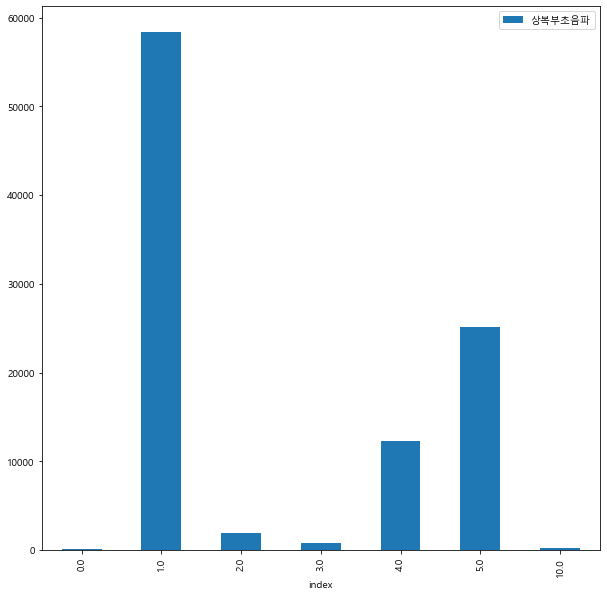

In [84]:
plt.rcParams["figure.figsize"] = (10, 10)
df[score_text_real].value_counts().reset_index().sort_values('index').plot.bar(x='index', y=score_text_real)

In [85]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,상복부초음파
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,98743.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.446108
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.826704
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,1.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,10.000000


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [86]:
df.isnull().sum()

검진년도                                  0
UID                                   0
CU_REC_ID                             0
SEX                                   0
검진당시나이                                0
신사구체여과율 (GFR)                    195462
크레아티닌(Creatinine)                  8670
요소질소 (BUN)                       162087
상복부초음파 (Abdominal Sono)_text     476337
상복부초음파                          1115156
dtype: int64

In [87]:
df_group = df.groupby(['UID', '검진년도'])

In [88]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [89]:
temp

['신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 '상복부초음파 (Abdominal Sono)_text',
 '상복부초음파']

In [90]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 신사구체여과율 (GFR)
column : 크레아티닌(Creatinine)
column : 요소질소 (BUN)
column : 상복부초음파 (Abdominal Sono)_text
column : 상복부초음파
2627.40014 sec


In [91]:
df.isnull().sum()

검진년도                                  0
UID                                   0
CU_REC_ID                             0
SEX                                   0
검진당시나이                                0
신사구체여과율 (GFR)                    181880
크레아티닌(Creatinine)                  7310
요소질소 (BUN)                       100808
상복부초음파 (Abdominal Sono)_text     433044
상복부초음파                          1109818
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [92]:
numeric_col = df.columns

In [93]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   신사구체여과율 (GFR)                 1030102 non-null  float64
 6   크레아티닌(Creatinine)             1205944 non-null  float64
 7   요소질소 (BUN)                    1112156 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null        float64
 9   상복부초음파                        104081 non-null   float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 88.0 MB


In [95]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.030102e+06,1.205944e+06,1.112156e+06,0.0,104081.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,9.581130e+01,9.705489e-01,1.268928e+01,NaN,2.443856
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.990541e+01,6.128727e+00,3.575537e+00,NaN,1.826281
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,8.200000e+01,7.000000e-01,1.030000e+01,NaN,1.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,9.400000e+01,9.000000e-01,1.222000e+01,NaN,1.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.080000e+02,1.000000e+00,1.460000e+01,NaN,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,9.870000e+02,3.440000e+03,4.200000e+02,NaN,10.000000


In [96]:
df_result = df.copy()

# 이상치 제거

In [97]:
len(df_result)

1213899

In [98]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [99]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [100]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 43.0 maximum : 147.0
신사구체여과율 (GFR) : 1213899 / IQR outliers:  16501 / ratio : 0.013593387917775696

minimum : 0.2499999999999999 maximum : 1.4500000000000002
크레아티닌(Creatinine) : 1213899 / IQR outliers:  5212 / ratio : 0.004293602680288887

minimum : 3.8500000000000023 maximum : 21.049999999999997
요소질소 (BUN) : 1213899 / IQR outliers:  18199 / ratio : 0.014992186335106957

minimum : nan maximum : nan
상복부초음파 (Abdominal Sono)_text : 1213899 / IQR outliers:  0 / ratio : 0.0

minimum : -5.0 maximum : 11.0
상복부초음파 : 1213899 / IQR outliers:  0 / ratio : 0.0



In [101]:
target_cols

['신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 '상복부초음파 (Abdominal Sono)_text',
 '상복부초음파']

In [102]:
minimums

[43.0, 0.2499999999999999, 3.8500000000000023, nan, -5.0]

In [103]:
maximums

[147.0, 1.4500000000000002, 21.049999999999997, nan, 11.0]

In [104]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177745 entries, 0 to 1177744
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1177745 non-null  int32  
 1   UID                           1177745 non-null  int64  
 2   CU_REC_ID                     1177745 non-null  int64  
 3   SEX                           1177745 non-null  int64  
 4   검진당시나이                        1177745 non-null  int64  
 5   신사구체여과율 (GFR)                 997652 non-null   float64
 6   크레아티닌(Creatinine)             1169844 non-null  float64
 7   요소질소 (BUN)                    1078372 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null        float64
 9   상복부초음파                        100344 non-null   float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 85.4 MB


In [105]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,7282,2520,1,42,NaN,1.13,12.0,NaN,NaN
1,2010,7490,3638,1,39,NaN,1.10,14.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,1.10,14.0,NaN,NaN
3,2010,8056,4745,1,42,108.0,0.80,8.0,NaN,NaN
4,2010,8457,3929,1,38,NaN,1.20,12.0,NaN,NaN


In [106]:
len(df_result)

1177745

In [107]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177745 entries, 0 to 1177744
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1177745 non-null  int32  
 1   UID                           1177745 non-null  int64  
 2   CU_REC_ID                     1177745 non-null  int64  
 3   SEX                           1177745 non-null  int64  
 4   검진당시나이                        1177745 non-null  int64  
 5   신사구체여과율 (GFR)                 997652 non-null   float64
 6   크레아티닌(Creatinine)             1169844 non-null  float64
 7   요소질소 (BUN)                    1078372 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null        float64
 9   상복부초음파                        100344 non-null   float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 85.4 MB


In [108]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
count,1.177745e+06,1.177745e+06,1.177745e+06,1.177745e+06,1.177745e+06,997652.000000,1.169844e+06,1.078372e+06,0.0,100344.000000
mean,2.021884e+03,5.089746e+05,1.493279e+06,1.367721e+00,4.074024e+01,95.135184,8.712051e-01,1.252512e+01,NaN,2.444003
std,1.697097e+00,3.655300e+05,7.937432e+05,4.821852e-01,8.864395e+00,17.540422,1.864226e-01,2.993988e+00,NaN,1.825400
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,43.000000,2.500000e-01,3.900000e+00,NaN,0.000000
25%,2.021000e+03,2.212630e+05,6.811170e+05,1.000000e+00,3.400000e+01,82.000000,7.000000e-01,1.030000e+01,NaN,1.000000
50%,2.022000e+03,3.806720e+05,1.412705e+06,1.000000e+00,4.000000e+01,94.000000,9.000000e-01,1.220000e+01,NaN,1.000000
75%,2.023000e+03,8.365450e+05,2.175277e+06,2.000000e+00,4.800000e+01,107.000000,1.000000e+00,1.440000e+01,NaN,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,147.000000,1.450000e+00,2.103000e+01,NaN,10.000000


# 스크리닝

## 요소질소 (BUN) 스크리닝

In [112]:
screening = 10

In [113]:
df_result[df_result['요소질소 (BUN)'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
3,2010,8056,4745,1,42,108.0,0.80,8.0,NaN,NaN
10,2010,15894,2533,2,29,NaN,0.60,8.3,NaN,NaN
21,2010,42223,1364,2,24,NaN,0.60,8.9,NaN,NaN
40,2010,117320,4034,1,37,NaN,1.08,9.1,NaN,NaN
41,2010,118079,1252,1,40,NaN,1.00,8.4,NaN,NaN


In [114]:
len(df_result[df_result['요소질소 (BUN)'] < screening])

204038

In [115]:
df_result.loc[df_result['요소질소 (BUN)'] < screening, '요소질소 (BUN)'] = screening

In [116]:
df_result[df_result['요소질소 (BUN)'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파


In [117]:
len(df_result[df_result['요소질소 (BUN)'] < screening])

0

In [147]:
target_cols

['신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 '상복부초음파 (Abdominal Sono)_text',
 '상복부초음파']

In [148]:
target_cols = [
 '신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)', 
 '상복부초음파'
]

# target (건강지수) 계산

In [118]:
len(df_result)

1177745

## Linear Regression coefficient 계산

In [119]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [120]:
# target_cols

In [121]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [122]:
# df_man[df_man['target'].isna()]

In [123]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [124]:
# df_target = pd.concat([df_man, df_woman])

In [125]:
# len(df_target)

In [126]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [127]:
# len(df_target)

In [128]:
# df_target[df_target['target'].isna()]

In [129]:
# df_target.info()

In [130]:
# df_target.head()

In [131]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [132]:
# len(df_target)

In [133]:
# df_target.describe()

In [134]:
# df_target[df_target['target'] == 50]

In [135]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [136]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [137]:
# len(df_target)

In [138]:
# df_target.head()

In [139]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

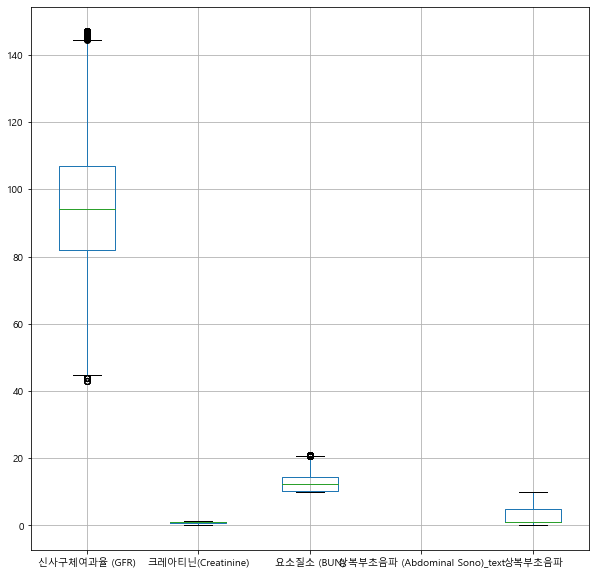

In [140]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [141]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,7282,2520,1,42,NaN,1.13,12.0,NaN,NaN
1,2010,7490,3638,1,39,NaN,1.10,14.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,1.10,14.0,NaN,NaN
3,2010,8056,4745,1,42,108.0,0.80,10.0,NaN,NaN
4,2010,8457,3929,1,38,NaN,1.20,12.0,NaN,NaN


In [142]:
target_cols

['신사구체여과율 (GFR)',
 '크레아티닌(Creatinine)',
 '요소질소 (BUN)',
 '상복부초음파 (Abdominal Sono)_text',
 '상복부초음파']

In [143]:
len(target_cols)

5

In [144]:
target_cols_direction

[False, True, 'center', True]

In [145]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 2) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

## 심각도 kde는 제외

In [149]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [152]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols[:3])
end = time.time()
print(f"{end - start:.5f} sec")

651.48283 sec


## 이상소견 심각도 scaling

In [153]:
target_cols[3]

'상복부초음파'

In [154]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean
310824,2010,609272,143,1,40,NaN,1.00,10.0,NaN,NaN,100.0,100.00,184.59,100.0,100.0
620576,2010,585711,154,1,52,NaN,0.86,11.8,NaN,NaN,100.0,131.50,179.11,100.0,100.0
522612,2010,593983,156,1,48,NaN,1.09,16.7,NaN,NaN,100.0,64.51,85.45,100.0,100.0
283776,2010,612330,185,1,39,NaN,1.20,11.2,NaN,NaN,100.0,29.15,175.26,100.0,100.0
25081,2010,645901,212,1,28,NaN,1.10,14.8,NaN,NaN,100.0,79.61,153.41,100.0,100.0


In [155]:
# 심각도 Min
# score_min = 0
# score_max = 10
# df_target[target_cols[3]+'_scaling'] = ((((df_target[target_cols[3]] - 0) / (10 - 0)) * -1) + 1) * 200

df_target[score_text_real + '_scaling'] = (100 - (df_target[score_text_real] * 10))

In [156]:
df_target[score_text_real].value_counts()

1.0     59320
5.0     25469
4.0     12507
2.0      1950
3.0       796
10.0      226
0.0        76
Name: 상복부초음파, dtype: int64

In [157]:
df_target[score_text_real + '_scaling'].value_counts()

90.0     59320
50.0     25469
60.0     12507
80.0      1950
70.0       796
0.0        226
100.0       76
Name: 상복부초음파_scaling, dtype: int64

In [158]:
df_target[score_text_real + '_scaling'].isnull().sum()

1077401

## 결측치 채우기

In [159]:
target_cols[3]

'상복부초음파'

In [160]:
df_target[target_cols[3]].fillna(fill_th, inplace=True)
df_target[score_text_real + '_scaling'].fillna(fill_th_score, inplace=True)

In [161]:
df_target['kde_mean'] = df_target.iloc[:, (5+len(target_cols)):(5+len(target_cols)+len(target_cols))].mean('columns').round(2)

In [162]:
df_target['kde_mean'].min()

0.37

In [163]:
df_target['kde_mean'].max()

149.74

In [164]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling
count,1.177745e+06,1.177745e+06,1.177745e+06,1.177745e+06,1.177745e+06,997652.000000,1.169844e+06,1.078372e+06,0.0,1.177745e+06,1.177745e+06,1.177745e+06,1.177745e+06,1077401.0,1.177745e+06,1.177745e+06
mean,2.021884e+03,5.089746e+05,1.493279e+06,1.367721e+00,4.074024e+01,95.135184,8.712051e-01,1.280306e+01,NaN,1.123029e+00,1.027859e+02,9.684115e+01,1.358379e+02,100.0,8.414705e+01,8.876971e+01
std,1.697097e+00,3.655300e+05,7.937432e+05,4.821852e-01,8.864395e+00,17.540422,1.864226e-01,2.620535e+00,NaN,6.681390e-01,3.410769e+01,4.111737e+01,5.813129e+01,0.0,2.455896e+01,6.681390e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,43.000000,2.500000e-01,1.000000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,100.0,3.700000e-01,0.000000e+00
25%,2.021000e+03,2.212630e+05,6.811170e+05,1.000000e+00,3.400000e+01,82.000000,7.000000e-01,1.030000e+01,NaN,1.000000e+00,8.761000e+01,6.805000e+01,9.499000e+01,100.0,6.755000e+01,9.000000e+01
50%,2.022000e+03,3.806720e+05,1.412705e+06,1.000000e+00,4.000000e+01,94.000000,9.000000e-01,1.220000e+01,NaN,1.000000e+00,1.000000e+02,1.000000e+02,1.596300e+02,100.0,8.584000e+01,9.000000e+01
75%,2.023000e+03,8.365450e+05,2.175277e+06,2.000000e+00,4.800000e+01,107.000000,1.000000e+00,1.440000e+01,NaN,1.000000e+00,1.177200e+02,1.217600e+02,1.857200e+02,100.0,1.003800e+02,9.000000e+01
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,147.000000,1.450000e+00,2.103000e+01,NaN,1.000000e+01,1.999500e+02,2.000000e+02,2.005200e+02,100.0,1.497400e+02,1.000000e+02


<AxesSubplot:>

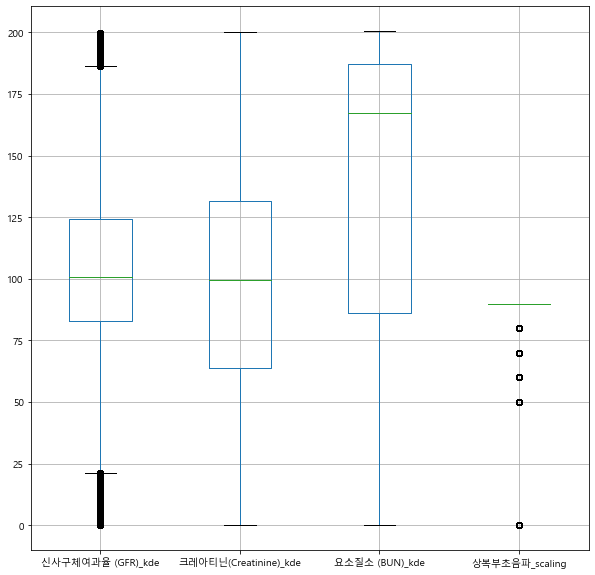

In [165]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

<AxesSubplot:>

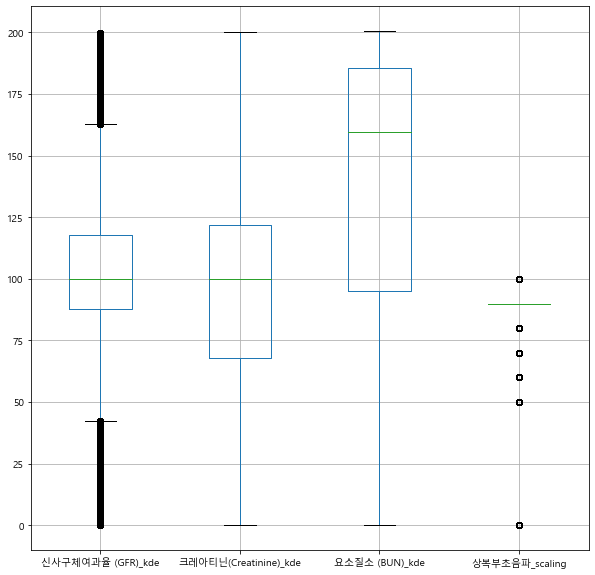

In [166]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

## target Scaling

In [167]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [168]:
df_target['target'] = (df_target['target'] * 100) + 50

In [169]:
df_target['target'] = df_target['target'].round(0)

In [170]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
75,50.0,14
73,51.0,88
72,52.0,149
70,53.0,370
69,54.0,554
68,55.0,701
67,56.0,854
65,57.0,1005
64,58.0,1256
62,59.0,1668


<AxesSubplot:>

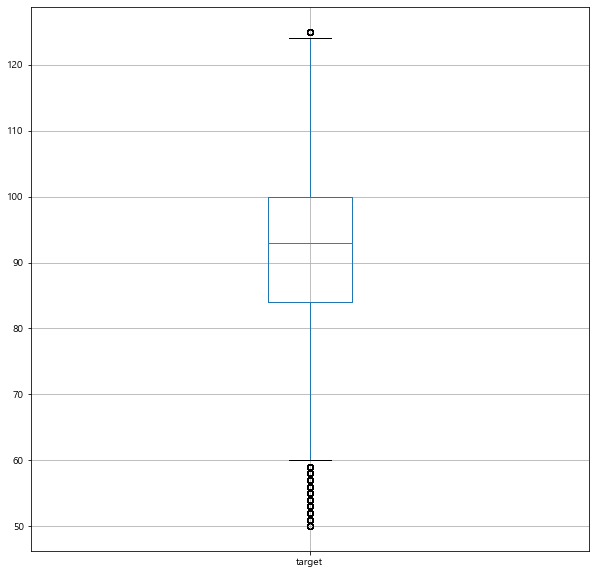

In [172]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

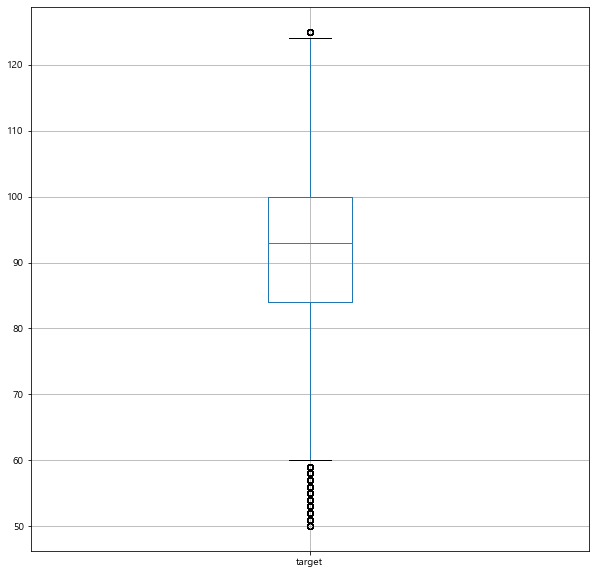

In [173]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

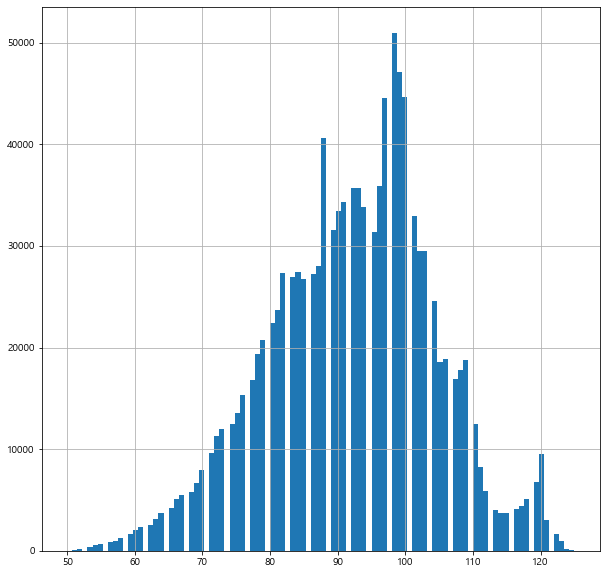

In [179]:
df_boxplot['target'].hist(bins=100)

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

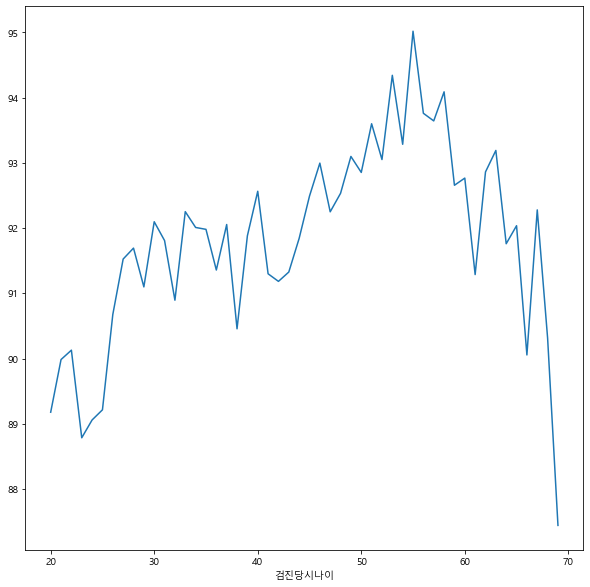

In [180]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

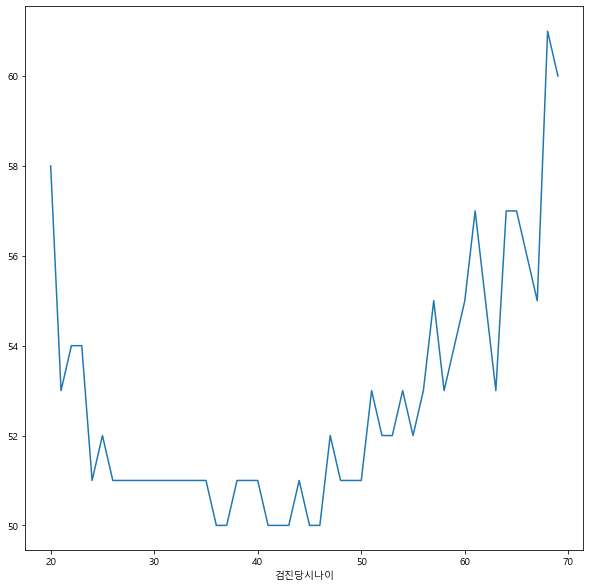

In [181]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

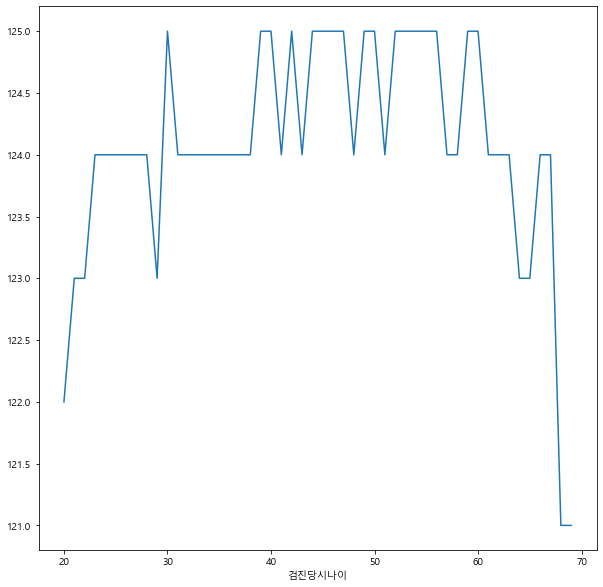

In [182]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [183]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
310824,2010,609272,143,1,40,NaN,1.00,10.0,NaN,1.0,100.0,100.00,184.59,100.0,96.40,90.0,98.0
620576,2010,585711,154,1,52,NaN,0.86,11.8,NaN,1.0,100.0,131.50,179.11,100.0,102.90,90.0,101.0
522612,2010,593983,156,1,48,NaN,1.09,16.7,NaN,1.0,100.0,64.51,85.45,100.0,62.74,90.0,81.0
283776,2010,612330,185,1,39,NaN,1.20,11.2,NaN,1.0,100.0,29.15,175.26,100.0,76.35,90.0,88.0
25081,2010,645901,212,1,28,NaN,1.10,14.8,NaN,1.0,100.0,79.61,153.41,100.0,83.50,90.0,92.0


# 결측행 제거

In [184]:
# df_result.dropna(axis=0).info()

In [185]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [186]:
df_target['SEX'].value_counts()

1    744663
2    433082
Name: SEX, dtype: int64

In [187]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

744663

In [188]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
310824,2010,609272,143,1,40,NaN,1.00,10.0,NaN,1.0,100.0,100.00,184.59,100.0,96.40,90.0,98.0
620576,2010,585711,154,1,52,NaN,0.86,11.8,NaN,1.0,100.0,131.50,179.11,100.0,102.90,90.0,101.0
522612,2010,593983,156,1,48,NaN,1.09,16.7,NaN,1.0,100.0,64.51,85.45,100.0,62.74,90.0,81.0
283776,2010,612330,185,1,39,NaN,1.20,11.2,NaN,1.0,100.0,29.15,175.26,100.0,76.35,90.0,88.0
25081,2010,645901,212,1,28,NaN,1.10,14.8,NaN,1.0,100.0,79.61,153.41,100.0,83.50,90.0,92.0


# 결측치 처리

## 결측치 삭제

In [189]:
# df_man.dropna(inplace=True)

In [190]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
310824,2010,609272,143,1,40,NaN,1.00,10.0,NaN,1.0,100.0,100.00,184.59,100.0,96.40,90.0,98.0
620576,2010,585711,154,1,52,NaN,0.86,11.8,NaN,1.0,100.0,131.50,179.11,100.0,102.90,90.0,101.0
522612,2010,593983,156,1,48,NaN,1.09,16.7,NaN,1.0,100.0,64.51,85.45,100.0,62.74,90.0,81.0
283776,2010,612330,185,1,39,NaN,1.20,11.2,NaN,1.0,100.0,29.15,175.26,100.0,76.35,90.0,88.0
25081,2010,645901,212,1,28,NaN,1.10,14.8,NaN,1.0,100.0,79.61,153.41,100.0,83.50,90.0,92.0


## 결측치 평균으로 대체

In [191]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [192]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [193]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [194]:
len(df_man)

744663

In [195]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [196]:
len(df_man)

744663

In [197]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
310824,2010,609272,143,1,40,NaN,1.00,10.0,NaN,1.0,100.0,100.00,184.59,100.0,96.40,90.0,98.0
620576,2010,585711,154,1,52,NaN,0.86,11.8,NaN,1.0,100.0,131.50,179.11,100.0,102.90,90.0,101.0
522612,2010,593983,156,1,48,NaN,1.09,16.7,NaN,1.0,100.0,64.51,85.45,100.0,62.74,90.0,81.0
283776,2010,612330,185,1,39,NaN,1.20,11.2,NaN,1.0,100.0,29.15,175.26,100.0,76.35,90.0,88.0
25081,2010,645901,212,1,28,NaN,1.10,14.8,NaN,1.0,100.0,79.61,153.41,100.0,83.50,90.0,92.0


## fillna

In [198]:
df_man.mean().round(2)

검진년도                               2021.90
UID                              514632.76
CU_REC_ID                       1496371.36
SEX                                   1.00
검진당시나이                               41.94
신사구체여과율 (GFR)                        91.91
크레아티닌(Creatinine)                     0.97
요소질소 (BUN)                           13.36
상복부초음파 (Abdominal Sono)_text           NaN
상복부초음파                                1.13
신사구체여과율 (GFR)_kde                   106.01
크레아티닌(Creatinine)_kde                97.10
요소질소 (BUN)_kde                      145.61
상복부초음파_kde                          100.00
kde_mean                             87.46
상복부초음파_scaling                       88.67
target                               93.73
dtype: float64

In [199]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [200]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [201]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [202]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [203]:
len(df_man)

744663

In [204]:
len(df_man)

744663

In [205]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [206]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
2296,2011,32,11757,1,24,91.91,1.00,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0
644360,2019,50,356493,1,53,83.00,1.00,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0
684776,2021,50,642497,1,55,68.00,1.20,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0
311429,2019,62,421626,1,40,87.00,1.00,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0
346028,2020,62,565527,1,41,78.00,1.10,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0
377579,2021,62,699357,1,42,87.00,1.00,16.2,NaN,1.0,97.05,93.56,78.79,100.0,67.60,90.0,84.0
409544,2022,62,1356310,1,43,105.00,0.84,12.7,NaN,1.0,123.31,137.28,173.68,100.0,108.82,90.0,104.0
441591,2023,62,2170394,1,44,93.00,0.93,13.1,NaN,1.0,108.86,83.29,176.94,100.0,92.52,90.0,96.0
597109,2019,67,410099,1,51,91.91,0.92,20.9,NaN,1.0,100.00,92.13,13.15,100.0,51.57,90.0,76.0
622795,2020,67,481109,1,52,91.91,0.82,14.9,NaN,1.0,100.00,145.06,158.33,100.0,101.10,90.0,101.0


In [207]:
len(df_man)

744663

In [208]:
df_man[target_cols]

,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파
2296,91.91,1.0,15.20,1.0
644360,83.00,1.0,13.50,1.0
684776,68.00,1.2,11.90,5.0
311429,87.00,1.0,13.80,1.0
346028,78.00,1.1,13.50,1.0
...,...,...,...,...
52660,120.00,0.8,11.40,1.0
302328,113.00,0.8,13.36,1.0
12047,117.00,0.9,15.60,1.0
656755,102.00,0.8,10.00,1.0


## first만 남겨두고 중복 제거

In [209]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [210]:
len(df_man)

630564

In [211]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
2296,2011,32,11757,1,24,91.91,1.00,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0
644360,2019,50,356493,1,53,83.00,1.00,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0
684776,2021,50,642497,1,55,68.00,1.20,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0
311429,2019,62,421626,1,40,87.00,1.00,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0
346028,2020,62,565527,1,41,78.00,1.10,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0
377579,2021,62,699357,1,42,87.00,1.00,16.2,NaN,1.0,97.05,93.56,78.79,100.0,67.60,90.0,84.0
409544,2022,62,1356310,1,43,105.00,0.84,12.7,NaN,1.0,123.31,137.28,173.68,100.0,108.82,90.0,104.0
441591,2023,62,2170394,1,44,93.00,0.93,13.1,NaN,1.0,108.86,83.29,176.94,100.0,92.52,90.0,96.0
597109,2019,67,410099,1,51,91.91,0.92,20.9,NaN,1.0,100.00,92.13,13.15,100.0,51.57,90.0,76.0
622795,2020,67,481109,1,52,91.91,0.82,14.9,NaN,1.0,100.00,145.06,158.33,100.0,101.10,90.0,101.0


In [212]:
df_man.reset_index(drop=True, inplace=True)

In [213]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
0,2011,32,11757,1,24,91.91,1.0,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0
1,2019,50,356493,1,53,83.00,1.0,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0
2,2021,50,642497,1,55,68.00,1.2,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0
3,2019,62,421626,1,40,87.00,1.0,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0
4,2020,62,565527,1,41,78.00,1.1,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0


In [214]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630564 entries, 0 to 630563
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   검진년도                          630564 non-null  int32  
 1   UID                           630564 non-null  int64  
 2   CU_REC_ID                     630564 non-null  int64  
 3   SEX                           630564 non-null  int64  
 4   검진당시나이                        630564 non-null  int64  
 5   신사구체여과율 (GFR)                 630564 non-null  float64
 6   크레아티닌(Creatinine)             630564 non-null  float64
 7   요소질소 (BUN)                    630564 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null       float64
 9   상복부초음파                        630564 non-null  float64
 10  신사구체여과율 (GFR)_kde             630564 non-null  float64
 11  크레아티닌(Creatinine)_kde         630564 non-null  float64
 12  요소질소 (BUN)_kde                630564 non-nul

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

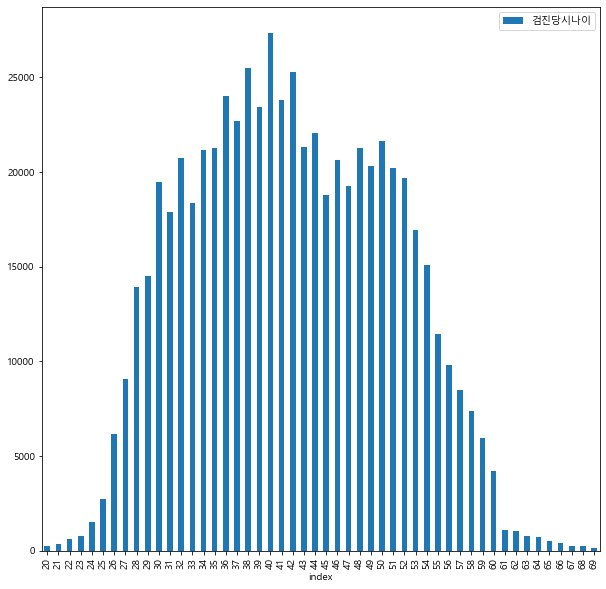

In [215]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [216]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,240
45,21,320
42,22,586
39,23,792
36,24,1501
35,25,2744
32,26,6177
29,27,9089
26,28,13941
25,29,14506


# 검진항목 시각화

In [217]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
count,630564.000000,6.305640e+05,6.305640e+05,630564.0,630564.000000,630564.000000,630564.000000,630564.000000,0.0,630564.000000,630564.000000,630564.000000,630564.000000,630564.0,630564.000000,630564.000000,630564.000000
mean,2021.849493,5.103012e+05,1.491683e+06,1.0,41.914776,92.046165,0.967705,13.365128,NaN,1.127437,106.169567,97.131092,145.233990,100.0,87.415558,88.725633,93.709917
std,1.760755,3.646586e+05,8.086789e+05,0.0,8.831479,14.603782,0.144476,2.543816,NaN,0.678709,33.726083,40.201103,48.286603,0.0,22.654702,6.787094,11.329560
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,47.000000,0.270000,10.000000,NaN,0.000000,0.040000,0.240000,4.000000,100.0,2.510000,0.000000,51.000000
25%,2021.000000,2.224840e+05,6.598448e+05,1.0,35.000000,83.000000,0.880000,11.300000,NaN,1.000000,94.310000,69.260000,102.400000,100.0,73.700000,90.000000,87.000000
50%,2022.000000,3.816980e+05,1.409504e+06,1.0,41.000000,91.910000,0.970000,13.300000,NaN,1.000000,100.000000,100.000000,166.850000,100.0,89.710000,90.000000,95.000000
75%,2023.000000,8.387540e+05,2.190262e+06,1.0,49.000000,100.000000,1.090000,15.000000,NaN,1.000000,124.540000,122.040000,183.400000,100.0,101.280000,90.000000,101.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,147.000000,1.450000,21.030000,NaN,10.000000,199.950000,200.000000,200.220000,100.0,149.740000,100.000000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

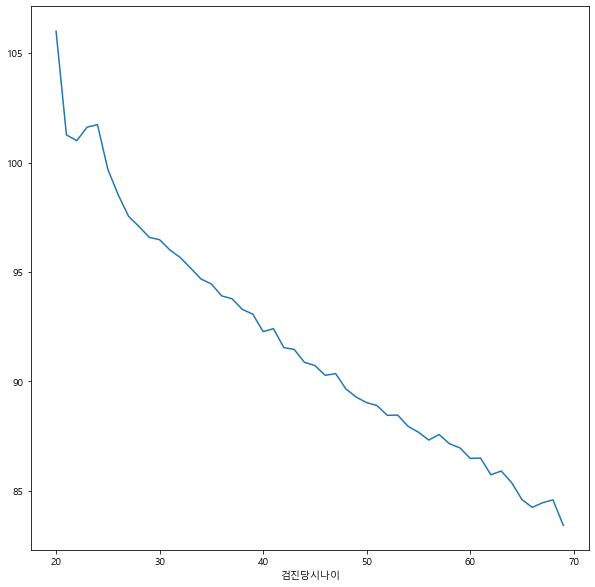

In [218]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

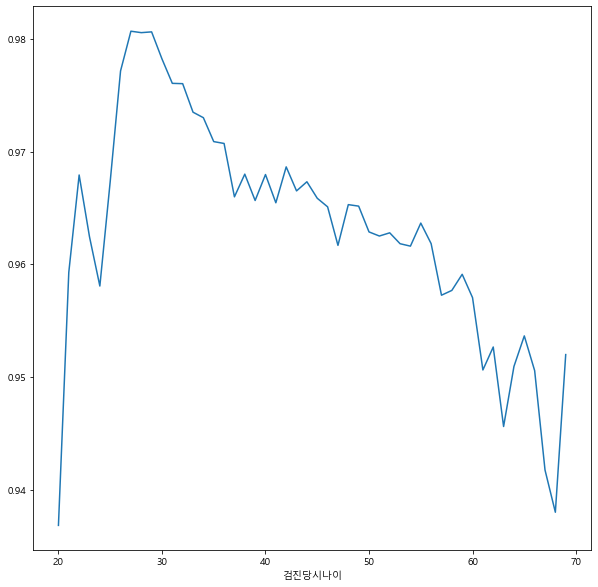

In [219]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

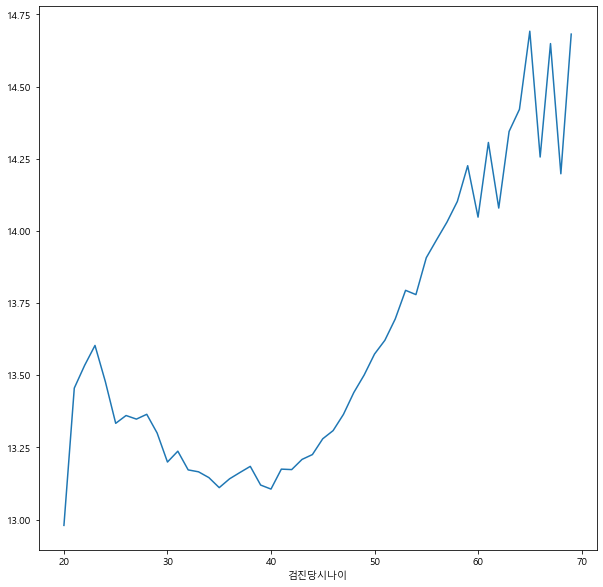

In [220]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

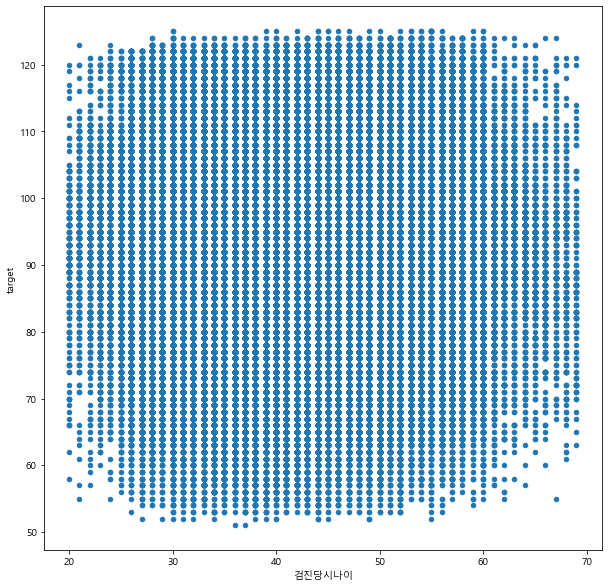

In [221]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

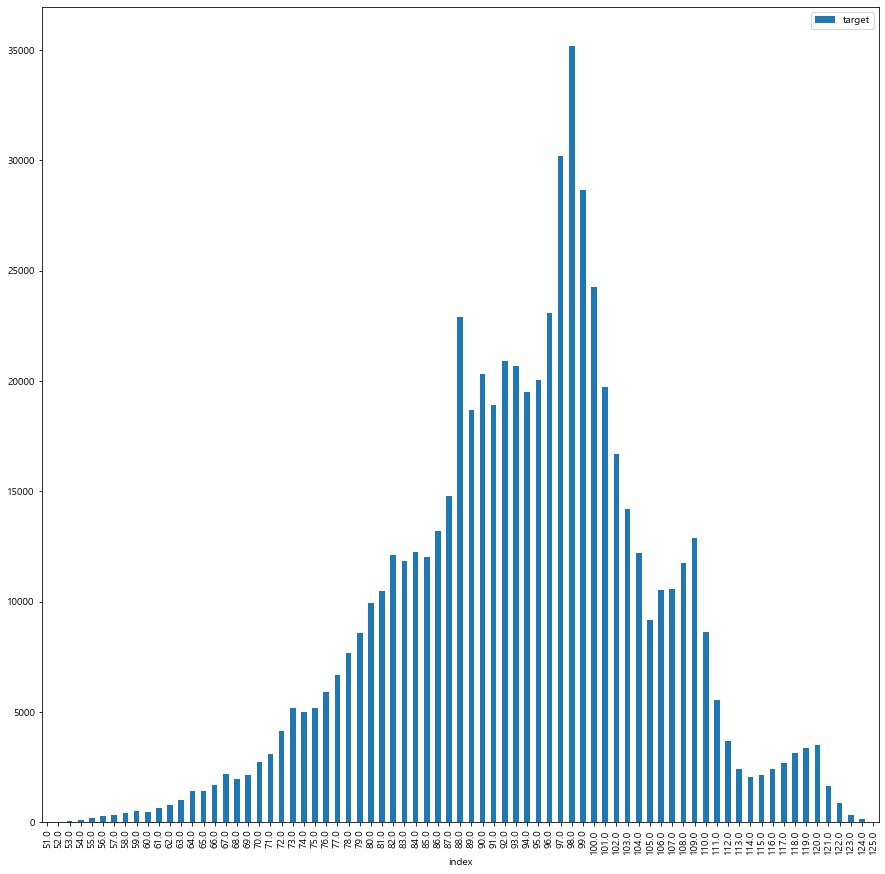

In [222]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [223]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,2
73,52.0,18
71,53.0,69
70,54.0,117
68,55.0,215
67,56.0,276
65,57.0,348
64,58.0,418
62,59.0,503
63,60.0,480


In [224]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [225]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

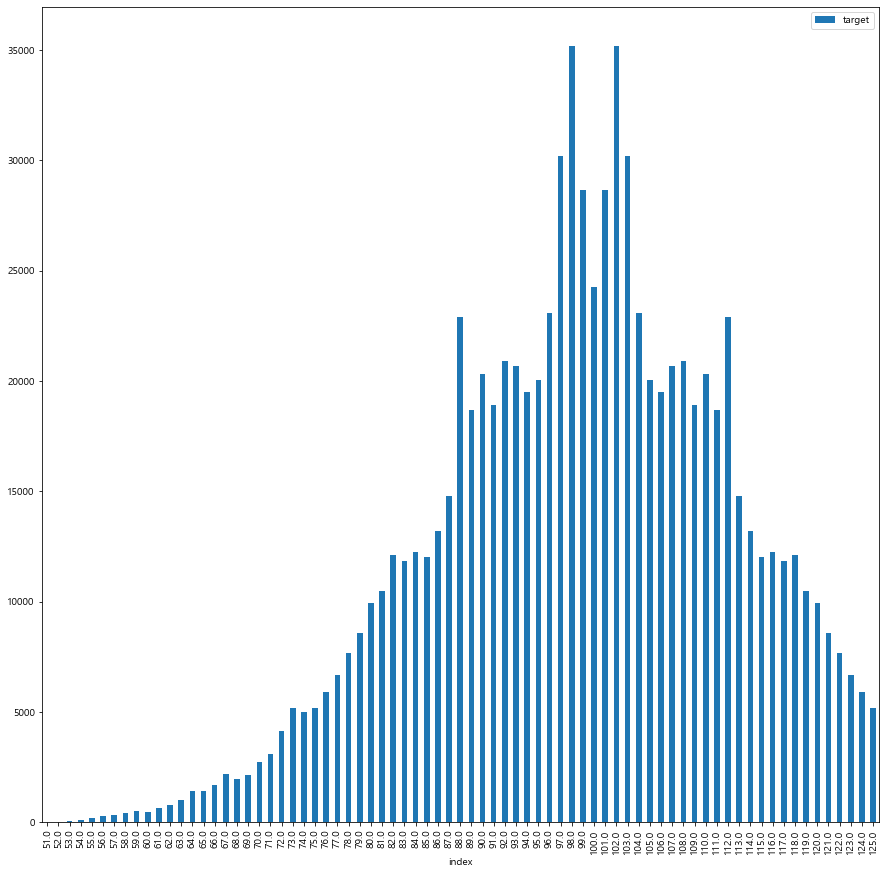

In [226]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [227]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,2
73,52.0,18
72,53.0,69
71,54.0,117
70,55.0,215
69,56.0,276
68,57.0,348
67,58.0,418
65,59.0,503
66,60.0,480


# 나이별 확인하기

In [228]:
# target = 'target'

In [229]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [230]:
# df_man = df_man_sample

In [231]:
# int(df_man['검진당시나이'].value_counts().mean())

In [232]:
# df_man['검진당시나이'].min()

In [233]:
# df_man['검진당시나이'].max()

In [234]:
# df_man.columns

In [235]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [236]:
# df_temp.info()

In [237]:
# df_temp.reset_index(drop=True, inplace=True)

In [238]:
# df_man = df_temp.copy()

In [239]:
# df_man['검진당시나이'].value_counts()

In [240]:
# df_man[df_man['검진당시나이']==38]

In [241]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [242]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파 (Abdominal Sono)_text',
       '상복부초음파', '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde',
       '요소질소 (BUN)_kde', '상복부초음파_kde', 'kde_mean', '상복부초음파_scaling', 'target'],
      dtype='object')

In [243]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [244]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [245]:
train_columns = target_cols.copy()

In [246]:
train_columns

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [247]:
train_columns.insert(0, '검진당시나이')

In [248]:
train_columns

['검진당시나이', '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [249]:
target_col = 'target'

## Min Max Scaling

In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
scaling_bool

False

In [252]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [253]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [254]:
# model = LinearRegression()

In [255]:
# model.fit(X_train, y_train)

In [256]:
# model.intercept_

In [257]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [258]:
model = XGBRegressor()

In [259]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [260]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [261]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 3124.16 seconds for 10 candidates parameter settings.


In [262]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [263]:
# best score
random_search.best_score_

-0.1545756074545758

In [264]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [265]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [266]:
# model = build_model()

In [267]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [268]:
# model.summary()

In [269]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [270]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [271]:
# plot_history(history)

## pyTorch 신경망

In [272]:
np.shape(X_train)[1]

5

In [273]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [274]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [275]:
# epochs = 1000

In [276]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [277]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [278]:
# plt.plot(losses)

## coef 계산

In [279]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [280]:
# df_coef.columns = ['검사항목', 'coef']

In [281]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [282]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [283]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [284]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [285]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [286]:
# slr = LinearRegression()

In [287]:
# slr.fit(X_train_poly, y_train)

In [288]:
# np.shape(X_train)

In [289]:
# np.shape(X_train_poly)

In [290]:
# np.shape(X_test)

In [291]:
# np.shape(X_test_poly)

In [292]:
# y_pred_poly = slr.predict(X_test_poly)

In [293]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [294]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [295]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [296]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f) 

# 성능 평가

## pyTorch 예측

In [297]:
pyTorch_bool

False

In [298]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [299]:
XGB_bool

True

In [300]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [301]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.29750700171043487
MSE : 0.15246893665046002
RMSE : 0.3904727092262147


In [302]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9990979817504458

In [303]:
model.score(X_test, y_test)

0.9990979817504458

## feature importance

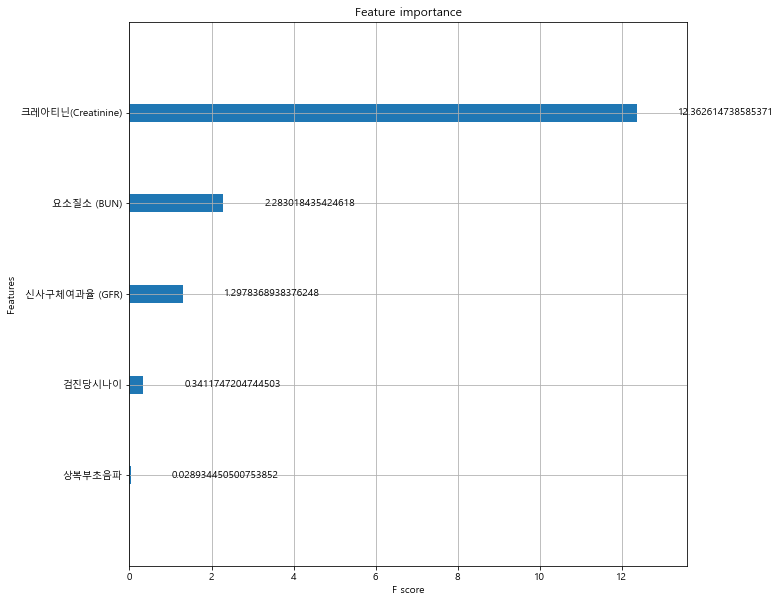

In [304]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [305]:
model.feature_importances_

array([0.02091354, 0.07955562, 0.7578113 , 0.13994588, 0.00177364],
      dtype=float32)

In [306]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [307]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,크레아티닌(Creatinine),0.757811
3,요소질소 (BUN),0.139946
1,신사구체여과율 (GFR),0.079556
0,검진당시나이,0.020914
4,상복부초음파,0.001774


# 실제지수 - 예측지수 결과

In [308]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,118.0
1,99.0
2,81.0
3,92.0
4,104.0
...,...
219987,117.0
219988,87.0
219989,109.0
219990,119.0


In [309]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,118.452194
1,99.365074
2,80.819908
3,92.412415
4,103.571640
...,...
219987,117.274101
219988,86.382042
219989,109.149345
219990,119.270103


In [310]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [311]:
df_test.head()

,target,0
0,118.0,118.452194
1,99.0,99.365074
2,81.0,80.819908
3,92.0,92.412415
4,104.0,103.571640


In [312]:
df_test.columns

Index(['target', 0], dtype='object')

In [313]:
df_test.columns = ['실제지수', '예측지수']

In [314]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [315]:
df_test.head()

,실제지수,예측지수,diff
0,118.0,118.452194,0.452194
1,99.0,99.365074,0.365074
2,81.0,80.819908,-0.180092
3,92.0,92.412415,0.412415
4,104.0,103.571640,-0.428360


In [316]:
df_test['diff_int'] = df_test['diff'].round(0)

In [317]:
len(df_test)

219992

In [318]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,118.0,118.452194,0.452194,0.0
1,99.0,99.365074,0.365074,0.0
2,81.0,80.819908,-0.180092,-0.0
3,92.0,92.412415,0.412415,0.0
4,104.0,103.571640,-0.428360,-0.0


<AxesSubplot:>

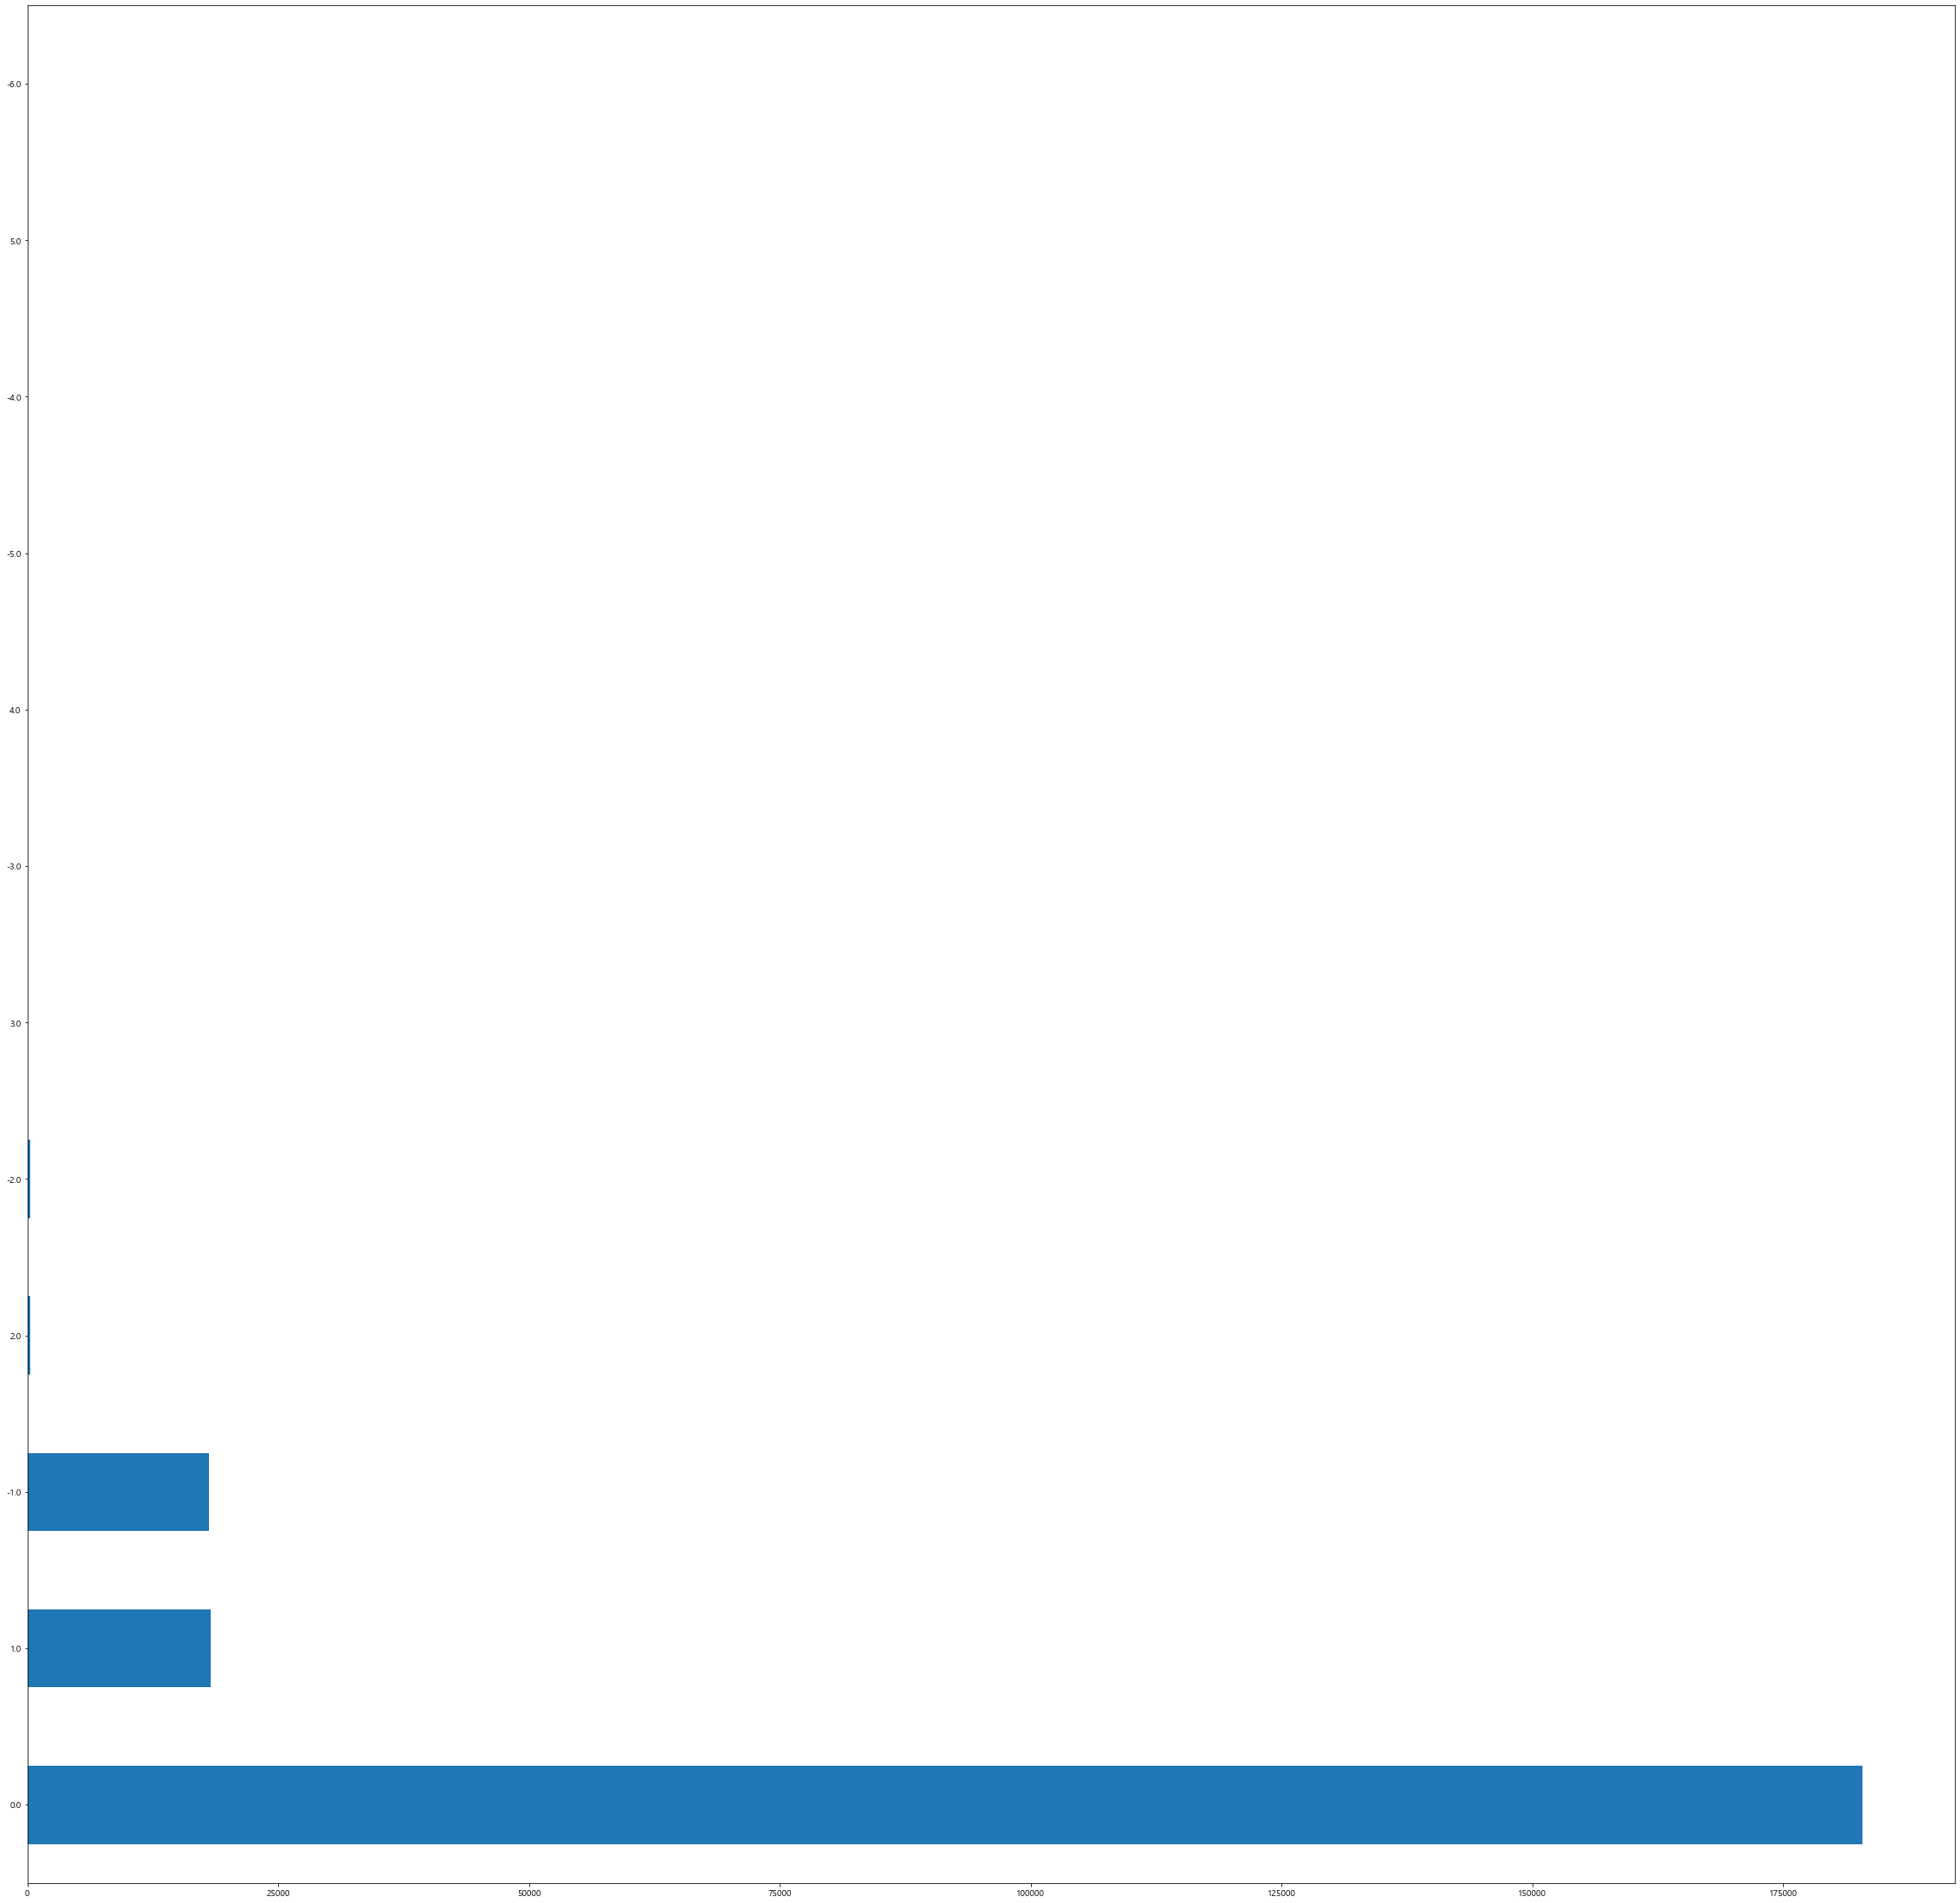

In [319]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [320]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    182950
 1.0     18229
-1.0     18111
 2.0       316
-2.0       294
 3.0        40
-3.0        34
 4.0         6
-5.0         4
-4.0         3
 5.0         3
-6.0         2
Name: diff_int, dtype: int64

In [321]:
df_test['예측지수'].round(0).value_counts()

102.0    8709
98.0     8581
103.0    7665
97.0     7630
99.0     7180
101.0    7087
100.0    6129
104.0    5806
96.0     5770
112.0    5731
88.0     5296
93.0     5214
92.0     5196
108.0    5182
105.0    5123
107.0    5087
90.0     5033
89.0     4962
94.0     4930
110.0    4924
95.0     4909
106.0    4875
111.0    4857
109.0    4662
91.0     4637
87.0     3817
113.0    3813
86.0     3404
114.0    3327
115.0    3057
85.0     3055
84.0     3037
118.0    3032
116.0    3009
83.0     2991
82.0     2964
117.0    2959
81.0     2753
119.0    2612
120.0    2473
80.0     2409
79.0     2200
121.0    2084
78.0     1918
122.0    1911
77.0     1692
123.0    1653
76.0     1483
124.0    1463
75.0     1349
125.0    1319
73.0     1306
74.0     1202
72.0     1055
71.0      823
70.0      693
67.0      569
69.0      556
68.0      469
66.0      416
65.0      376
64.0      352
63.0      269
62.0      174
61.0      160
59.0      133
60.0      113
58.0      112
57.0       91
56.0       64
55.0       43
54.0  

# 예측 나이 분포

In [322]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [323]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [324]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [325]:
df_plot = pd.DataFrame(y_test.value_counts())

In [326]:
df_plot.columns = ['count']

In [327]:
df_plot.reset_index(inplace=True)

In [328]:
df_plot = df_plot.sort_values('index', ascending=True)

In [329]:
df_plot

,index,count
73,52.0,5
72,53.0,18
71,54.0,33
70,55.0,38
69,56.0,72
68,57.0,87
66,58.0,114
65,59.0,135
67,60.0,110
64,61.0,141


In [330]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

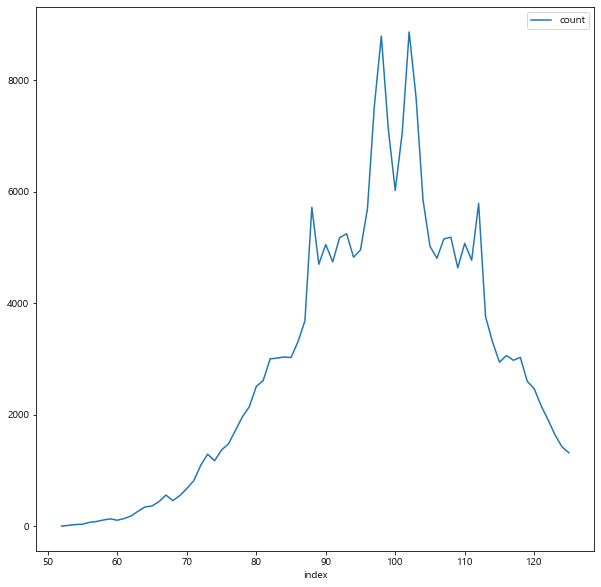

In [331]:
df_plot.plot()

In [332]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [333]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [334]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [335]:
df_plot.columns = ['count']

In [336]:
df_plot.reset_index(inplace=True)

In [337]:
df_plot = df_plot.sort_values(0, ascending=True)

In [338]:
df_plot.set_index(0, inplace=True)

In [339]:
df_plot

,count
0,
52.0,5
53.0,19
54.0,33
55.0,43
56.0,64
57.0,91
58.0,112
59.0,133
60.0,113


<AxesSubplot:xlabel='0'>

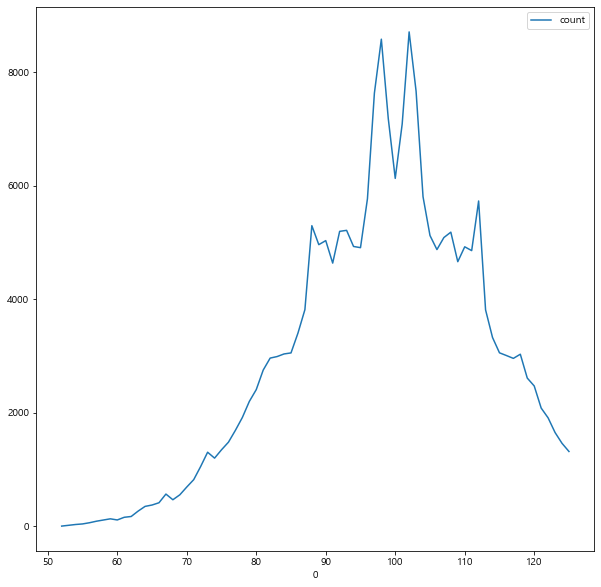

In [340]:
df_plot.plot()

# 시각화

In [341]:
# model.coef_

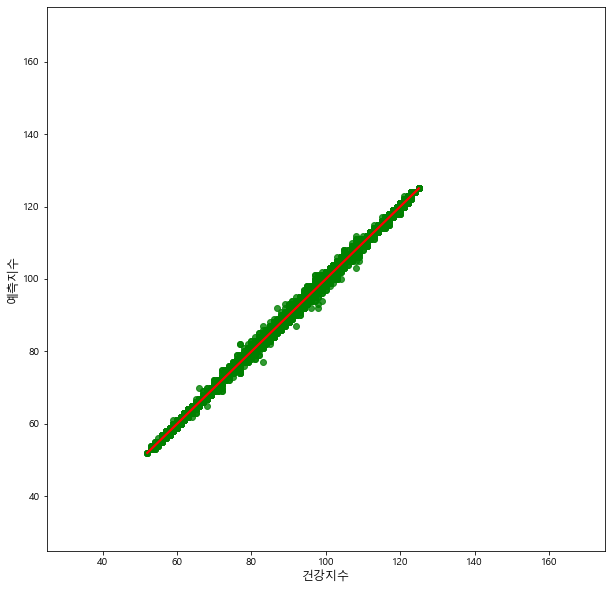

In [342]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [343]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
0,2011,32,11757,1,24,91.91,1.0,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0
1,2019,50,356493,1,53,83.00,1.0,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0
2,2021,50,642497,1,55,68.00,1.2,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0
3,2019,62,421626,1,40,87.00,1.0,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0
4,2020,62,565527,1,41,78.00,1.1,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0


In [344]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630564 entries, 0 to 630563
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   검진년도                          630564 non-null  int32  
 1   UID                           630564 non-null  int64  
 2   CU_REC_ID                     630564 non-null  int64  
 3   SEX                           630564 non-null  int64  
 4   검진당시나이                        630564 non-null  int64  
 5   신사구체여과율 (GFR)                 630564 non-null  float64
 6   크레아티닌(Creatinine)             630564 non-null  float64
 7   요소질소 (BUN)                    630564 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null       float64
 9   상복부초음파                        630564 non-null  float64
 10  신사구체여과율 (GFR)_kde             630564 non-null  float64
 11  크레아티닌(Creatinine)_kde         630564 non-null  float64
 12  요소질소 (BUN)_kde                630564 non-nul

In [345]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
97553,2022,168996,2259500,1,35,76.0,1.1,10.1,NaN,1.0,65.72,72.50,193.56,100.0,83.20,90.0,92.0
97554,2023,168996,2259499,1,36,76.0,1.1,13.2,NaN,1.0,61.98,67.61,154.67,100.0,71.32,90.0,86.0
97555,2024,168996,2281994,1,37,86.0,1.1,12.6,NaN,1.0,97.95,68.03,179.82,100.0,86.70,90.0,93.0


In [346]:
train_columns

['검진당시나이', '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [347]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [348]:
len(df_pred)

630564

In [349]:
df_pred.reset_index(drop=True, inplace=True)

In [350]:
X_test

,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파
135243,33,130.00,0.70,12.10,1.0
466997,36,113.00,0.83,15.00,1.0
419161,48,64.00,1.20,12.00,1.0
178423,54,77.38,1.06,12.90,1.0
227507,33,108.00,0.86,14.10,1.0
...,...,...,...,...,...
603009,53,118.00,0.70,10.10,1.0
523068,48,101.00,0.90,17.60,1.0
558689,32,130.00,0.70,13.36,1.0
293691,38,124.00,0.70,10.00,1.0


In [351]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파 (Abdominal Sono)_text',
       '상복부초음파', '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde',
       '요소질소 (BUN)_kde', '상복부초음파_kde', 'kde_mean', '상복부초음파_scaling', 'target'],
      dtype='object')

In [352]:
df_pred[train_columns]

,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파
0,24,91.91,1.0,15.20,1.0
1,53,83.00,1.0,13.50,1.0
2,55,68.00,1.2,11.90,5.0
3,40,87.00,1.0,13.80,1.0
4,41,78.00,1.1,13.50,1.0
...,...,...,...,...,...
630559,29,120.00,0.8,11.40,1.0
630560,39,113.00,0.8,13.36,1.0
630561,26,117.00,0.9,15.60,1.0
630562,53,102.00,0.8,10.00,1.0


In [353]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [354]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [355]:
pred_data = pred_data.round(0)

In [356]:
pred_data

array([ 93., 100.,  86., ...,  98., 106.,  92.], dtype=float32)

In [357]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [358]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [359]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target,예측지수
0,2011,32,11757,1,24,91.91,1.00,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0,93.0
1,2019,50,356493,1,53,83.00,1.00,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0,100.0
2,2021,50,642497,1,55,68.00,1.20,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0,86.0
3,2019,62,421626,1,40,87.00,1.00,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0,93.0
4,2020,62,565527,1,41,78.00,1.10,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0,89.0
5,2021,62,699357,1,42,87.00,1.00,16.2,NaN,1.0,97.05,93.56,78.79,100.0,67.60,90.0,84.0,84.0
6,2022,62,1356310,1,43,105.00,0.84,12.7,NaN,1.0,123.31,137.28,173.68,100.0,108.82,90.0,104.0,105.0
7,2023,62,2170394,1,44,93.00,0.93,13.1,NaN,1.0,108.86,83.29,176.94,100.0,92.52,90.0,96.0,97.0
8,2019,67,410099,1,51,91.91,0.92,20.9,NaN,1.0,100.00,92.13,13.15,100.0,51.57,90.0,76.0,76.0
9,2020,67,481109,1,52,91.91,0.82,14.9,NaN,1.0,100.00,145.06,158.33,100.0,101.10,90.0,101.0,100.0


## 예측지수 성능평가

In [360]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.18633318743220356

# target으로 나이 계산

In [361]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [362]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target,예측지수,예측나이
0,2011,32,11757,1,24,91.910000,1.00,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0,93.0,25.4
1,2019,50,356493,1,53,83.000000,1.00,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0,100.0,53.0
2,2021,50,642497,1,55,68.000000,1.20,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0,86.0,57.8
3,2019,62,421626,1,40,87.000000,1.00,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0,93.0,41.4
4,2020,62,565527,1,41,78.000000,1.10,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0,89.0,43.2
5,2021,62,699357,1,42,87.000000,1.00,16.2,NaN,1.0,97.05,93.56,78.79,100.0,67.60,90.0,84.0,84.0,45.2
6,2022,62,1356310,1,43,105.000000,0.84,12.7,NaN,1.0,123.31,137.28,173.68,100.0,108.82,90.0,104.0,105.0,42.0
7,2023,62,2170394,1,44,93.000000,0.93,13.1,NaN,1.0,108.86,83.29,176.94,100.0,92.52,90.0,96.0,97.0,44.6
8,2019,67,410099,1,51,91.910000,0.92,20.9,NaN,1.0,100.00,92.13,13.15,100.0,51.57,90.0,76.0,76.0,55.8
9,2020,67,481109,1,52,91.910000,0.82,14.9,NaN,1.0,100.00,145.06,158.33,100.0,101.10,90.0,101.0,100.0,52.0


## 예측나이 성능평가

In [363]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.9961313998261867

# 최종 산출

In [364]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target,예측지수,예측나이
0,2011,32,11757,1,24,91.91,1.0,15.2,NaN,1.0,100.00,100.00,142.01,100.0,85.75,90.0,93.0,93.0,25.4
1,2019,50,356493,1,53,83.00,1.0,13.5,NaN,1.0,99.02,99.31,199.92,100.0,99.81,90.0,100.0,100.0,53.0
2,2021,50,642497,1,55,68.00,1.2,11.9,NaN,5.0,61.73,31.46,191.46,100.0,72.41,50.0,86.0,86.0,57.8
3,2019,62,421626,1,40,87.00,1.0,13.8,NaN,1.0,100.05,100.00,146.67,100.0,86.93,90.0,93.0,93.0,41.4
4,2020,62,565527,1,41,78.00,1.1,13.5,NaN,1.0,88.36,69.94,154.82,100.0,78.53,90.0,89.0,89.0,43.2


In [365]:
# df_output.to_csv('man.csv')

# DataMart csv

In [366]:
df_copy = df.copy()

In [367]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,7282,2520,1,42,NaN,1.13,12.0,NaN,NaN
1,2010,7490,3638,1,39,NaN,1.10,14.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,1.10,14.0,NaN,NaN
3,2010,8056,4745,1,42,108.0,0.80,8.0,NaN,NaN
4,2010,8457,3929,1,38,NaN,1.20,12.0,NaN,NaN


In [368]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   신사구체여과율 (GFR)                 1030102 non-null  float64
 6   크레아티닌(Creatinine)             1205944 non-null  float64
 7   요소질소 (BUN)                    1112156 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null        float64
 9   상복부초음파                        104081 non-null   float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 88.0 MB


In [369]:
minimums

[43.0, 0.2499999999999999, 3.8500000000000023, nan, -5.0]

In [370]:
maximums

[147.0, 1.4500000000000002, 21.049999999999997, nan, 11.0]

In [371]:
train_columns

['검진당시나이', '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [372]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [373]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [374]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [375]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,7282,2520,1,42,NaN,1.13,12.0,NaN,NaN
1,2010,7490,3638,1,39,NaN,1.10,14.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,1.10,14.0,NaN,NaN
3,2010,8056,4745,1,42,108.0,0.80,8.0,NaN,NaN
4,2010,8457,3929,1,38,NaN,1.20,12.0,NaN,NaN


## 검진 항목 all 결측치 지우기

In [376]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [377]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [378]:
df_man_csv.reset_index(drop=True, inplace=True)

In [379]:
len(df_man_csv)

761669

## fillna

In [380]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

In [381]:
screening = 10

In [382]:
scr_col = '요소질소 (BUN)'

In [383]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
3,2010,8056,4745,1,42,108.00,0.80,8.0,NaN,1.13
34,2010,117320,4034,1,37,92.05,1.08,9.1,NaN,1.13
35,2010,118079,1252,1,40,92.05,1.00,8.4,NaN,1.13
37,2010,119919,1867,1,41,92.05,1.10,9.5,NaN,1.13
39,2010,122861,1250,1,36,92.05,1.20,8.1,NaN,1.13


In [384]:
len(df_man_csv[df_man_csv[scr_col] < screening])

76161

In [385]:
df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [386]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파


In [387]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [388]:
len(df_man_csv)

761669

## 모델 예측

In [389]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [390]:
pred_data = pred_data.round(0)

In [391]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [392]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수
0,2010,7282,2520,1,42,92.05,1.13,12.0,NaN,1.13,91.0
1,2010,7490,3638,1,39,92.05,1.10,14.0,NaN,1.13,89.0
2,2010,7915,3997,1,36,92.05,1.10,14.0,NaN,1.13,88.0
3,2010,8056,4745,1,42,108.00,0.80,10.0,NaN,1.13,108.0
4,2010,8457,3929,1,38,92.05,1.20,12.0,NaN,1.13,88.0


### 성능 평가

In [393]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [394]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [395]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [396]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 2.030130148397795


In [397]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9085600346377843

In [398]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
0,2010,7282,2520,1,42,92.05,1.13,12.0,NaN,1.13,91.0,43.8
1,2010,7490,3638,1,39,92.05,1.10,14.0,NaN,1.13,89.0,41.2
2,2010,7915,3997,1,36,92.05,1.10,14.0,NaN,1.13,88.0,38.4
3,2010,8056,4745,1,42,108.00,0.80,10.0,NaN,1.13,108.0,40.4
4,2010,8457,3929,1,38,92.05,1.20,12.0,NaN,1.13,88.0,40.4


In [399]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761669 entries, 0 to 761668
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   검진년도                          761669 non-null  int32  
 1   UID                           761669 non-null  int64  
 2   CU_REC_ID                     761669 non-null  int64  
 3   SEX                           761669 non-null  int64  
 4   검진당시나이                        761669 non-null  int64  
 5   신사구체여과율 (GFR)                 761669 non-null  float64
 6   크레아티닌(Creatinine)             761669 non-null  float64
 7   요소질소 (BUN)                    761669 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null       float64
 9   상복부초음파                        761669 non-null  float64
 10  예측지수                          761669 non-null  float32
 11  예측나이                          761669 non-null  float64
dtypes: float32(1), float64(6), int32(1), int64(4

# 최종 UID별 확인

In [400]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
286319,2022,175673,751348,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286320,2022,175673,1463838,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286256,2022,175673,1919125,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286321,2022,175673,2169120,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286257,2022,175673,2223795,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286258,2022,175673,2237465,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286322,2022,175673,2238320,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
286323,2022,175673,2246042,1,48,120.0,0.7,10.0,NaN,1.13,118.0,44.4
455810,2023,175673,1463893,1,49,90.0,0.9,14.2,NaN,1.13,97.0,49.6
455806,2023,175673,1919126,1,49,90.0,0.9,14.2,NaN,1.13,97.0,49.6


In [401]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
207464,2021,289587,796178,1,47,104.0,0.8,12.6,NaN,1.00,106.0,45.8
319534,2022,289587,866076,1,48,103.0,0.8,10.0,NaN,1.13,106.0,46.8
319489,2022,289587,2115999,1,48,103.0,0.8,10.0,NaN,1.13,106.0,46.8
107451,2022,289587,2603574,1,48,103.0,0.8,10.0,NaN,1.13,106.0,46.8
507197,2023,289587,1487447,1,49,103.0,0.8,11.7,NaN,1.13,107.0,47.6
507198,2023,289587,2227964,1,49,103.0,0.8,11.7,NaN,1.13,107.0,47.6
696945,2024,289587,2243723,1,50,105.0,0.8,12.7,NaN,1.13,109.0,48.2
696923,2024,289587,2603575,1,50,105.0,0.8,12.7,NaN,1.13,109.0,48.2


In [402]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
424547,2022,897603,1066133,1,51,79.0,1.0,13.3,NaN,1.13,98.0,51.4
424560,2022,897603,1068885,1,51,79.0,1.0,13.3,NaN,1.13,98.0,51.4
424562,2022,897603,1728532,1,51,79.0,1.0,13.3,NaN,1.13,98.0,51.4
424563,2022,897603,2555144,1,51,79.0,1.0,13.3,NaN,1.13,98.0,51.4
601693,2023,897603,1458387,1,52,78.0,1.0,16.5,NaN,1.13,87.0,54.6
601695,2023,897603,1728531,1,52,78.0,1.0,16.5,NaN,1.13,87.0,54.6
590204,2023,897603,2120063,1,52,78.0,1.0,16.5,NaN,1.13,87.0,54.6
590205,2023,897603,2351665,1,52,78.0,1.0,16.5,NaN,1.13,87.0,54.6
601696,2023,897603,2555143,1,52,78.0,1.0,16.5,NaN,1.13,87.0,54.6
590206,2023,897603,2622260,1,52,78.0,1.0,16.5,NaN,1.13,87.0,54.6


In [403]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
269670,2022,119172,751336,1,41,93.0,0.9,12.9,NaN,1.13,97.0,41.6
269671,2022,119172,1432355,1,41,93.0,0.9,12.9,NaN,1.13,97.0,41.6
269668,2022,119172,1432476,1,41,93.0,0.9,12.9,NaN,1.13,97.0,41.6
269672,2022,119172,2247083,1,41,93.0,0.9,12.9,NaN,1.13,97.0,41.6
269673,2022,119172,2252956,1,41,93.0,0.9,12.9,NaN,1.13,97.0,41.6
441402,2023,119172,1436742,1,42,93.0,0.9,13.8,NaN,1.13,94.0,43.2
441403,2023,119172,2247082,1,42,93.0,0.9,13.8,NaN,1.13,94.0,43.2
441404,2023,119172,2252955,1,42,93.0,0.9,13.8,NaN,1.13,94.0,43.2
678412,2024,119172,2250063,1,43,105.0,0.9,13.2,NaN,1.13,98.0,43.4
678413,2024,119172,2252954,1,43,105.0,0.9,13.2,NaN,1.13,98.0,43.4


In [404]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
601688,2023,897595,1525045,1,40,125.0,0.7,11.5,NaN,1.13,118.0,36.4
601689,2023,897595,1593851,1,40,125.0,0.7,11.5,NaN,1.13,118.0,36.4
601686,2023,897595,2005289,1,40,125.0,0.7,11.5,NaN,1.13,118.0,36.4
601687,2023,897595,2138998,1,40,125.0,0.7,11.5,NaN,1.13,118.0,36.4
585721,2023,897595,2320478,1,40,125.0,0.7,11.5,NaN,1.13,118.0,36.4
601690,2023,897595,2328772,1,40,125.0,0.7,11.5,NaN,1.13,118.0,36.4
739169,2024,897595,2329051,1,41,111.0,0.8,10.6,NaN,1.13,107.0,39.6


In [405]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
371246,2022,492764,909688,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
371247,2022,492764,1575802,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
371250,2022,492764,1668547,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
371248,2022,492764,2246777,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
371249,2022,492764,2330256,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
157072,2022,492764,2343199,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
175796,2022,492764,2363393,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
175797,2022,492764,2639564,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
175798,2022,492764,2703924,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6
371251,2022,492764,2783328,1,39,83.0,1.0,10.8,NaN,1.13,97.0,39.6


In [406]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
606122,2023,933936,1431742,1,40,83.0,1.0,13.6,NaN,1.13,93.0,41.4
606123,2023,933936,1435266,1,40,83.0,1.0,13.6,NaN,1.13,93.0,41.4
740515,2024,933936,2242997,1,41,93.0,1.0,12.7,NaN,1.13,97.0,41.6


In [407]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
283756,2022,168996,919754,1,35,76.0,1.1,10.1,NaN,1.13,92.0,36.6
283757,2022,168996,1425925,1,35,76.0,1.1,10.1,NaN,1.13,92.0,36.6
283758,2022,168996,2259500,1,35,76.0,1.1,10.1,NaN,1.13,92.0,36.6
453533,2023,168996,1425970,1,36,76.0,1.1,13.2,NaN,1.13,85.0,39.0
453534,2023,168996,1475832,1,36,76.0,1.1,13.2,NaN,1.13,85.0,39.0
453535,2023,168996,2259499,1,36,76.0,1.1,13.2,NaN,1.13,85.0,39.0
683676,2024,168996,2281994,1,37,86.0,1.1,12.6,NaN,1.13,93.0,38.4


# 여성 모델

In [409]:
df_target['SEX'].value_counts()

1    744663
2    433082
Name: SEX, dtype: int64

In [410]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

433082

# 결측치 처리

## 결측치 삭제

In [411]:
# df_woman.dropna(inplace=True)

In [412]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
784036,2010,710490,213,2,28,NaN,0.8,10.0,NaN,1.0,100.0,78.68,198.90,100.0,94.65,90.0,97.0
747842,2010,315847,230,2,23,NaN,1.1,15.2,NaN,1.0,100.0,3.09,24.05,100.0,32.04,90.0,66.0
750022,2010,719072,231,2,24,NaN,1.2,12.7,NaN,1.0,100.0,0.35,56.31,100.0,39.42,90.0,70.0
1005195,2010,552037,332,2,41,NaN,0.8,13.0,NaN,1.0,100.0,65.56,50.89,100.0,54.36,90.0,77.0
784037,2010,710522,632,2,28,NaN,0.7,10.2,NaN,1.0,100.0,100.00,194.42,100.0,98.85,90.0,99.0


## 결측치 평균으로 대체

In [413]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [414]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [415]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [416]:
len(df_woman)

433082

In [417]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [418]:
len(df_woman)

433082

In [419]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
784036,2010,710490,213,2,28,NaN,0.8,10.0,NaN,1.0,100.0,78.68,198.90,100.0,94.65,90.0,97.0
747842,2010,315847,230,2,23,NaN,1.1,15.2,NaN,1.0,100.0,3.09,24.05,100.0,32.04,90.0,66.0
750022,2010,719072,231,2,24,NaN,1.2,12.7,NaN,1.0,100.0,0.35,56.31,100.0,39.42,90.0,70.0
1005195,2010,552037,332,2,41,NaN,0.8,13.0,NaN,1.0,100.0,65.56,50.89,100.0,54.36,90.0,77.0
784037,2010,710522,632,2,28,NaN,0.7,10.2,NaN,1.0,100.0,100.00,194.42,100.0,98.85,90.0,99.0


In [420]:
len(df_woman)

433082

## fillna

In [421]:
df_woman.mean().round(2)

검진년도                               2021.85
UID                              499245.71
CU_REC_ID                       1487961.20
SEX                                   2.00
검진당시나이                               38.67
신사구체여과율 (GFR)                       100.64
크레아티닌(Creatinine)                     0.71
요소질소 (BUN)                           11.84
상복부초음파 (Abdominal Sono)_text           NaN
상복부초음파                                1.11
신사구체여과율 (GFR)_kde                    97.24
크레아티닌(Creatinine)_kde                96.40
요소질소 (BUN)_kde                      119.04
상복부초음파_kde                          100.00
kde_mean                             78.44
상복부초음파_scaling                       88.95
target                               89.22
dtype: float64

In [422]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [423]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [424]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [425]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [426]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
784036,2010,710490,213,2,28,100.64,0.8,10.0,NaN,1.0,100.0,78.68,198.90,100.0,94.65,90.0,97.0
747842,2010,315847,230,2,23,100.64,1.1,15.2,NaN,1.0,100.0,3.09,24.05,100.0,32.04,90.0,66.0
750022,2010,719072,231,2,24,100.64,1.2,12.7,NaN,1.0,100.0,0.35,56.31,100.0,39.42,90.0,70.0
1005195,2010,552037,332,2,41,100.64,0.8,13.0,NaN,1.0,100.0,65.56,50.89,100.0,54.36,90.0,77.0
784037,2010,710522,632,2,28,100.64,0.7,10.2,NaN,1.0,100.0,100.00,194.42,100.0,98.85,90.0,99.0


# 중복 제거

In [430]:
len(df_woman)

433082

In [431]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [432]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
900184,2023,48,2484053,2,35,100.64,0.71,11.84,NaN,1.0,100.00,100.00,100.00,100.0,75.25,90.0,88.0
789089,2023,53,2632764,2,28,118.00,0.60,11.84,NaN,1.0,111.77,115.65,100.00,100.0,82.10,90.0,91.0
811548,2024,53,2658222,2,29,130.00,0.50,10.00,NaN,1.0,149.65,175.99,198.15,100.0,131.20,90.0,116.0
815410,2020,54,497669,2,30,102.73,0.71,10.00,NaN,1.0,103.20,93.70,198.93,100.0,99.21,90.0,100.0
852144,2022,54,1319859,2,32,88.00,0.80,15.20,NaN,1.0,79.16,76.60,17.42,100.0,43.54,90.0,72.0
871212,2023,54,2039511,2,33,102.00,0.70,10.00,NaN,1.0,103.94,100.00,198.49,100.0,100.86,90.0,100.0
892938,2024,54,2750990,2,34,96.19,0.80,10.00,NaN,1.0,87.62,72.75,199.24,100.0,90.15,90.0,95.0
813717,2019,56,1605927,2,30,89.00,0.80,11.84,NaN,1.0,84.17,70.84,100.00,100.0,64.00,90.0,82.0
832331,2020,56,1605928,2,31,143.00,0.50,11.84,NaN,1.0,182.66,179.44,100.00,100.0,115.78,90.0,108.0
849041,2021,56,1605929,2,32,142.00,0.50,11.84,NaN,1.0,185.79,176.17,100.00,100.0,115.74,90.0,108.0


## first만 남겨두고 중복 제거

In [433]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [434]:
df_woman.reset_index(drop=True, inplace=True)

In [435]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
0,2023,48,2484053,2,35,100.64,0.71,11.84,NaN,1.0,100.00,100.00,100.00,100.0,75.25,90.0,88.0
1,2023,53,2632764,2,28,118.00,0.60,11.84,NaN,1.0,111.77,115.65,100.00,100.0,82.10,90.0,91.0
2,2024,53,2658222,2,29,130.00,0.50,10.00,NaN,1.0,149.65,175.99,198.15,100.0,131.20,90.0,116.0
3,2020,54,497669,2,30,102.73,0.71,10.00,NaN,1.0,103.20,93.70,198.93,100.0,99.21,90.0,100.0
4,2022,54,1319859,2,32,88.00,0.80,15.20,NaN,1.0,79.16,76.60,17.42,100.0,43.54,90.0,72.0
5,2023,54,2039511,2,33,102.00,0.70,10.00,NaN,1.0,103.94,100.00,198.49,100.0,100.86,90.0,100.0
6,2024,54,2750990,2,34,96.19,0.80,10.00,NaN,1.0,87.62,72.75,199.24,100.0,90.15,90.0,95.0
7,2019,56,1605927,2,30,89.00,0.80,11.84,NaN,1.0,84.17,70.84,100.00,100.0,64.00,90.0,82.0
8,2020,56,1605928,2,31,143.00,0.50,11.84,NaN,1.0,182.66,179.44,100.00,100.0,115.78,90.0,108.0
9,2021,56,1605929,2,32,142.00,0.50,11.84,NaN,1.0,185.79,176.17,100.00,100.0,115.74,90.0,108.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

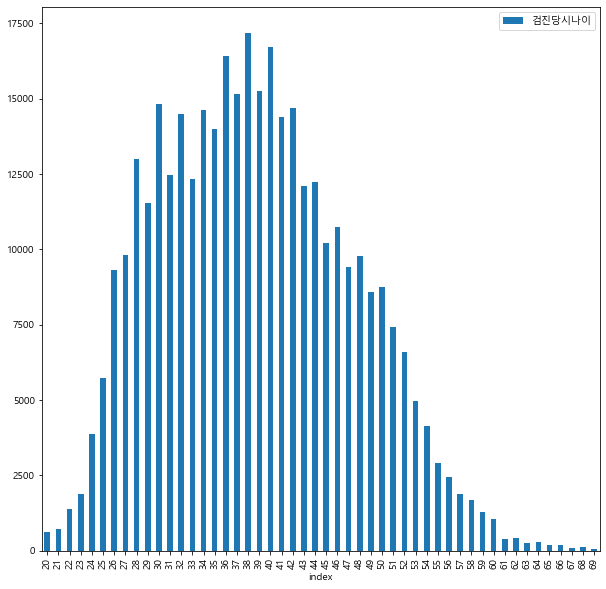

In [436]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [437]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,632
39,21,714
36,22,1378
33,23,1888
30,24,3861
27,25,5711
22,26,9304
19,27,9801
11,28,12983
16,29,11517


# 검진항목 시각화

In [438]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
count,368358.000000,3.683580e+05,3.683580e+05,368358.0,368358.000000,368358.000000,368358.000000,368358.000000,0.0,368358.000000,368358.000000,368358.000000,368358.000000,368358.0,368358.000000,368358.000000,368358.000000
mean,2021.788668,4.944142e+05,1.476016e+06,2.0,38.698193,100.615666,0.706808,11.845135,NaN,1.098117,97.231402,95.957848,118.799847,100.0,78.271864,89.018835,89.133286
std,1.734419,3.659873e+05,8.102243e+05,0.0,8.529124,17.029664,0.121585,2.145326,NaN,0.600297,33.147394,42.538820,68.707948,0.0,26.280503,6.002971,13.139963
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,43.000000,0.250000,10.000000,NaN,0.000000,0.000000,0.000000,0.010000,100.0,0.370000,0.000000,50.000000
25%,2021.000000,2.154150e+05,6.466888e+05,2.0,32.000000,89.000000,0.600000,10.000000,NaN,1.000000,80.650000,65.990000,57.960000,100.0,59.900000,90.000000,80.000000
50%,2022.000000,3.697510e+05,1.386326e+06,2.0,38.000000,100.640000,0.700000,11.300000,NaN,1.000000,100.000000,100.000000,100.000000,100.0,77.200000,90.000000,89.000000
75%,2023.000000,8.230788e+05,2.175490e+06,2.0,45.000000,112.000000,0.800000,12.900000,NaN,1.000000,109.170000,119.940000,198.090000,100.0,98.490000,90.000000,99.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,147.000000,1.410000,21.000000,NaN,10.000000,199.870000,200.000000,200.520000,100.0,148.040000,100.000000,124.000000


<AxesSubplot:xlabel='검진당시나이'>

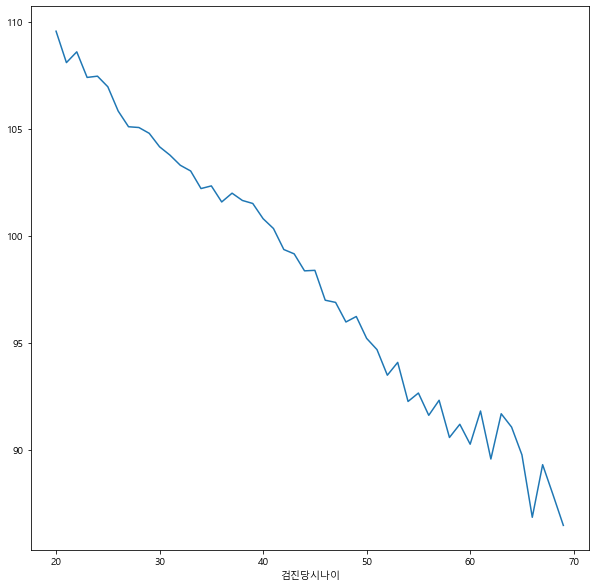

In [439]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

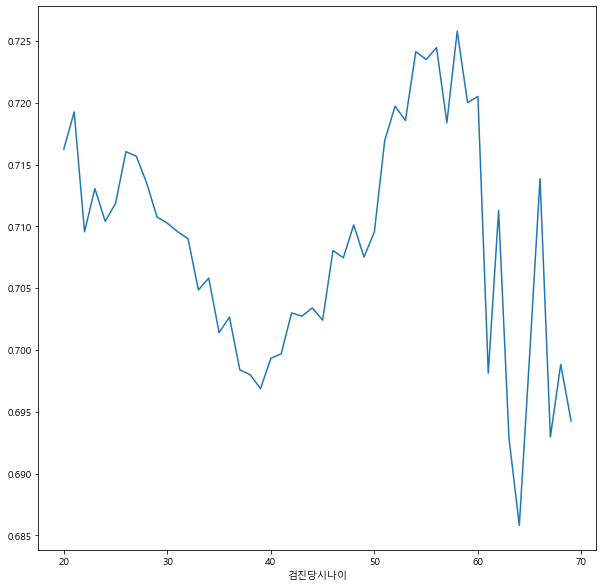

In [440]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

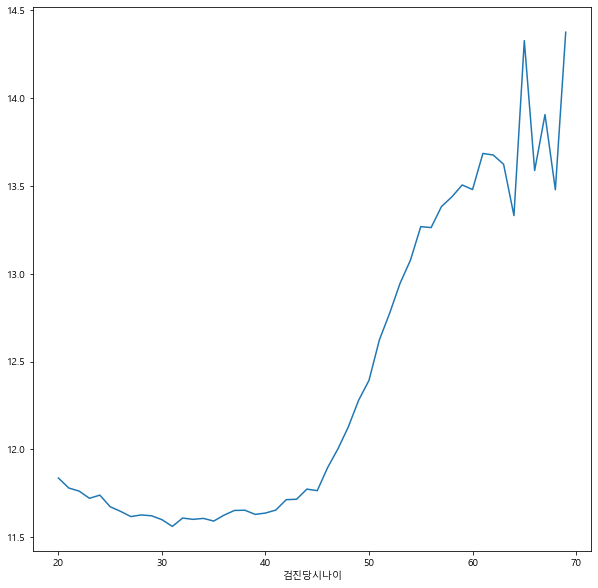

In [441]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

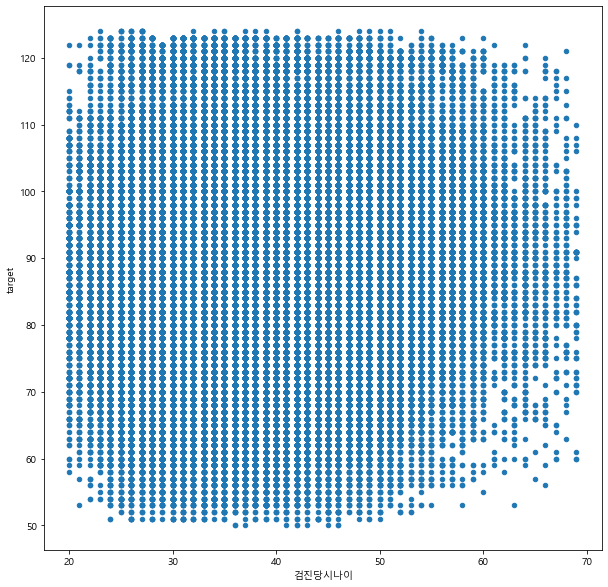

In [442]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

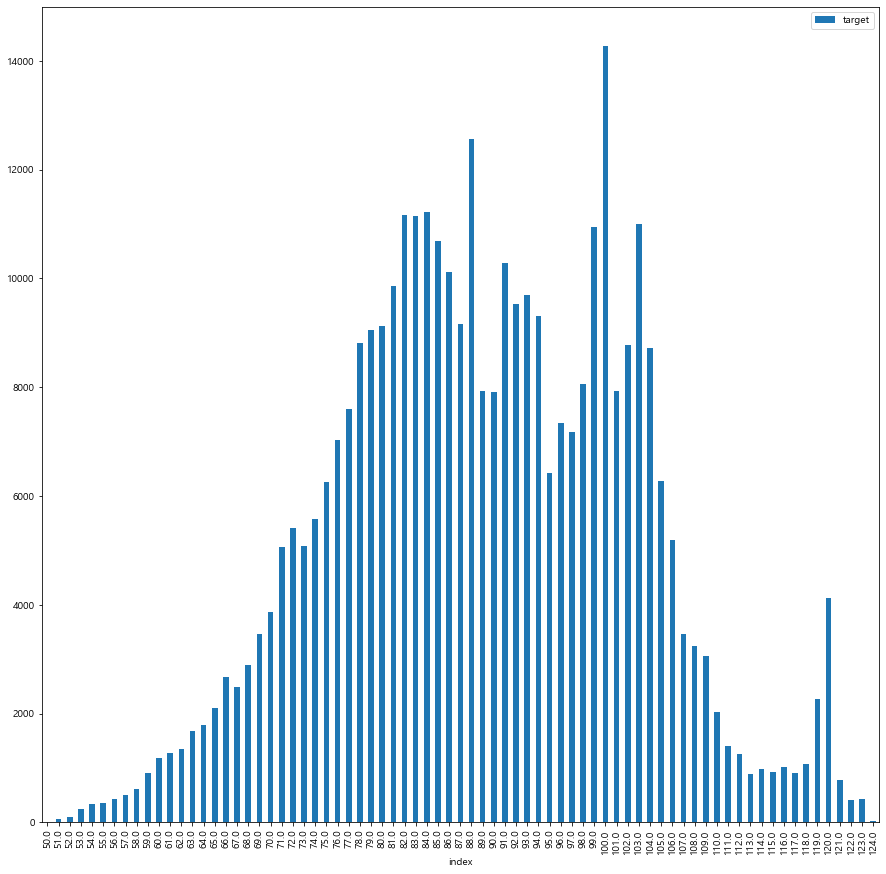

In [443]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [444]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
74,50.0,10
72,51.0,72
71,52.0,107
70,53.0,240
69,54.0,335
68,55.0,365
66,56.0,422
64,57.0,497
63,58.0,617
60,59.0,905


In [445]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [446]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

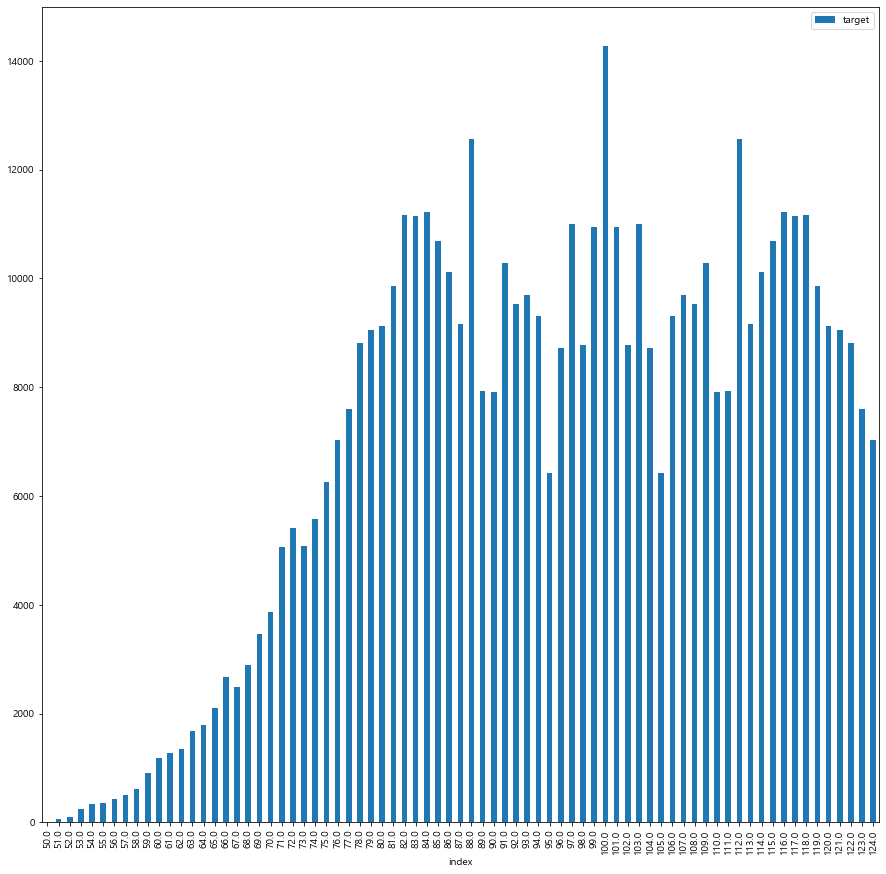

In [447]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [448]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
74,50.0,10
73,51.0,72
72,52.0,107
71,53.0,240
70,54.0,335
69,55.0,365
68,56.0,422
67,57.0,497
66,58.0,617
65,59.0,905


# 나이별 확인하기

In [449]:
# df_woman['검진당시나이'].value_counts()

In [450]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [451]:
# df_woman['검진당시나이'].min()

In [452]:
# df_woman['검진당시나이'].max()

In [453]:
# df_woman.columns

In [454]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [455]:
# df_temp.info()

In [456]:
# df_temp.reset_index(drop=True, inplace=True)

In [457]:
# df_woman = df_temp.copy()

In [458]:
# df_woman['검진당시나이'].value_counts()

In [459]:
# df_woman[df_woman['검진당시나이']==20]

In [460]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [461]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [462]:
train_columns

['검진당시나이', '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [463]:
# target_col = '검진당시나이'

In [464]:
target_col

'target'

## Min Max Scaling

In [465]:
from sklearn.preprocessing import MinMaxScaler

In [466]:
scaling_bool

False

In [467]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [468]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [469]:
# model2 = LinearRegression()

In [470]:
# model2.fit(X_train2, y_train2)

In [471]:
# model2.intercept_

In [472]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [473]:
model2 = XGBRegressor()

In [474]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [475]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [476]:
import time
start = time.time()

random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 2183.31 seconds for 10 candidates parameter settings.


In [477]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [478]:
# best score
random_search.best_score_

-0.12834178133522672

In [479]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [480]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [481]:
# model = build_model()

In [482]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [483]:
# model.summary()

In [484]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [485]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [486]:
# plot_history(history)

## pyTorch 신경망

In [487]:
np.shape(X_train)[1]

5

In [488]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [489]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [490]:
# epochs = 1000

In [491]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [492]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [493]:
# plt.plot(losses)

## coef 계산

In [494]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [495]:
# df_coef2.columns = ['검사항목', 'coef']

In [496]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [497]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [498]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [499]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [500]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [501]:
# slr2 = LinearRegression()

In [502]:
# slr2.fit(X_train2_poly, y_train2)

In [503]:
# np.shape(X_train2)

In [504]:
# np.shape(X_train2_poly)

In [505]:
# np.shape(X_test2)

In [506]:
# np.shape(X_test2_poly)

In [507]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [508]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [509]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [510]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [511]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [512]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [513]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [514]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.2511868132375737
MSE : 0.12772992468707692
RMSE : 0.35739323536837814


In [515]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.999521682085631

In [516]:
model2.score(X_test2, y_test2)

0.999521682085631

## feature importance

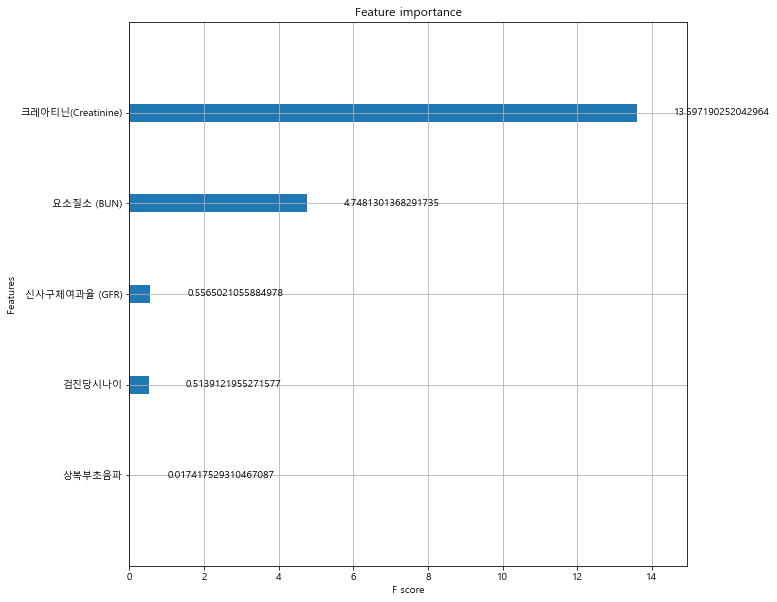

In [517]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [518]:
model2.feature_importances_

array([0.02644513, 0.02863674, 0.69969034, 0.24433143, 0.00089628],
      dtype=float32)

In [519]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [520]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,크레아티닌(Creatinine),0.699690
3,요소질소 (BUN),0.244331
1,신사구체여과율 (GFR),0.028637
0,검진당시나이,0.026445
4,상복부초음파,0.000896


# 실제나이 - 예측나이 결과

In [521]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [522]:
df_test2.head()

,target,0
0,58.0,58.504700
1,83.0,82.635445
2,56.0,56.075211
3,115.0,115.630867
4,105.0,104.725426


In [523]:
df_test2.columns

Index(['target', 0], dtype='object')

In [524]:
df_test2.columns = ['실제지수', '예측지수']

In [525]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [526]:
df_test2.head()

,실제지수,예측지수,diff
0,58.0,58.504700,0.504700
1,83.0,82.635445,-0.364555
2,56.0,56.075211,0.075211
3,115.0,115.630867,0.630867
4,105.0,104.725426,-0.274574


In [527]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [528]:
len(df_test2)

131552

In [529]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,58.0,58.504700,0.504700,1.0
1,83.0,82.635445,-0.364555,-0.0
2,56.0,56.075211,0.075211,0.0
3,115.0,115.630867,0.630867,1.0
4,105.0,104.725426,-0.274574,-0.0


<AxesSubplot:>

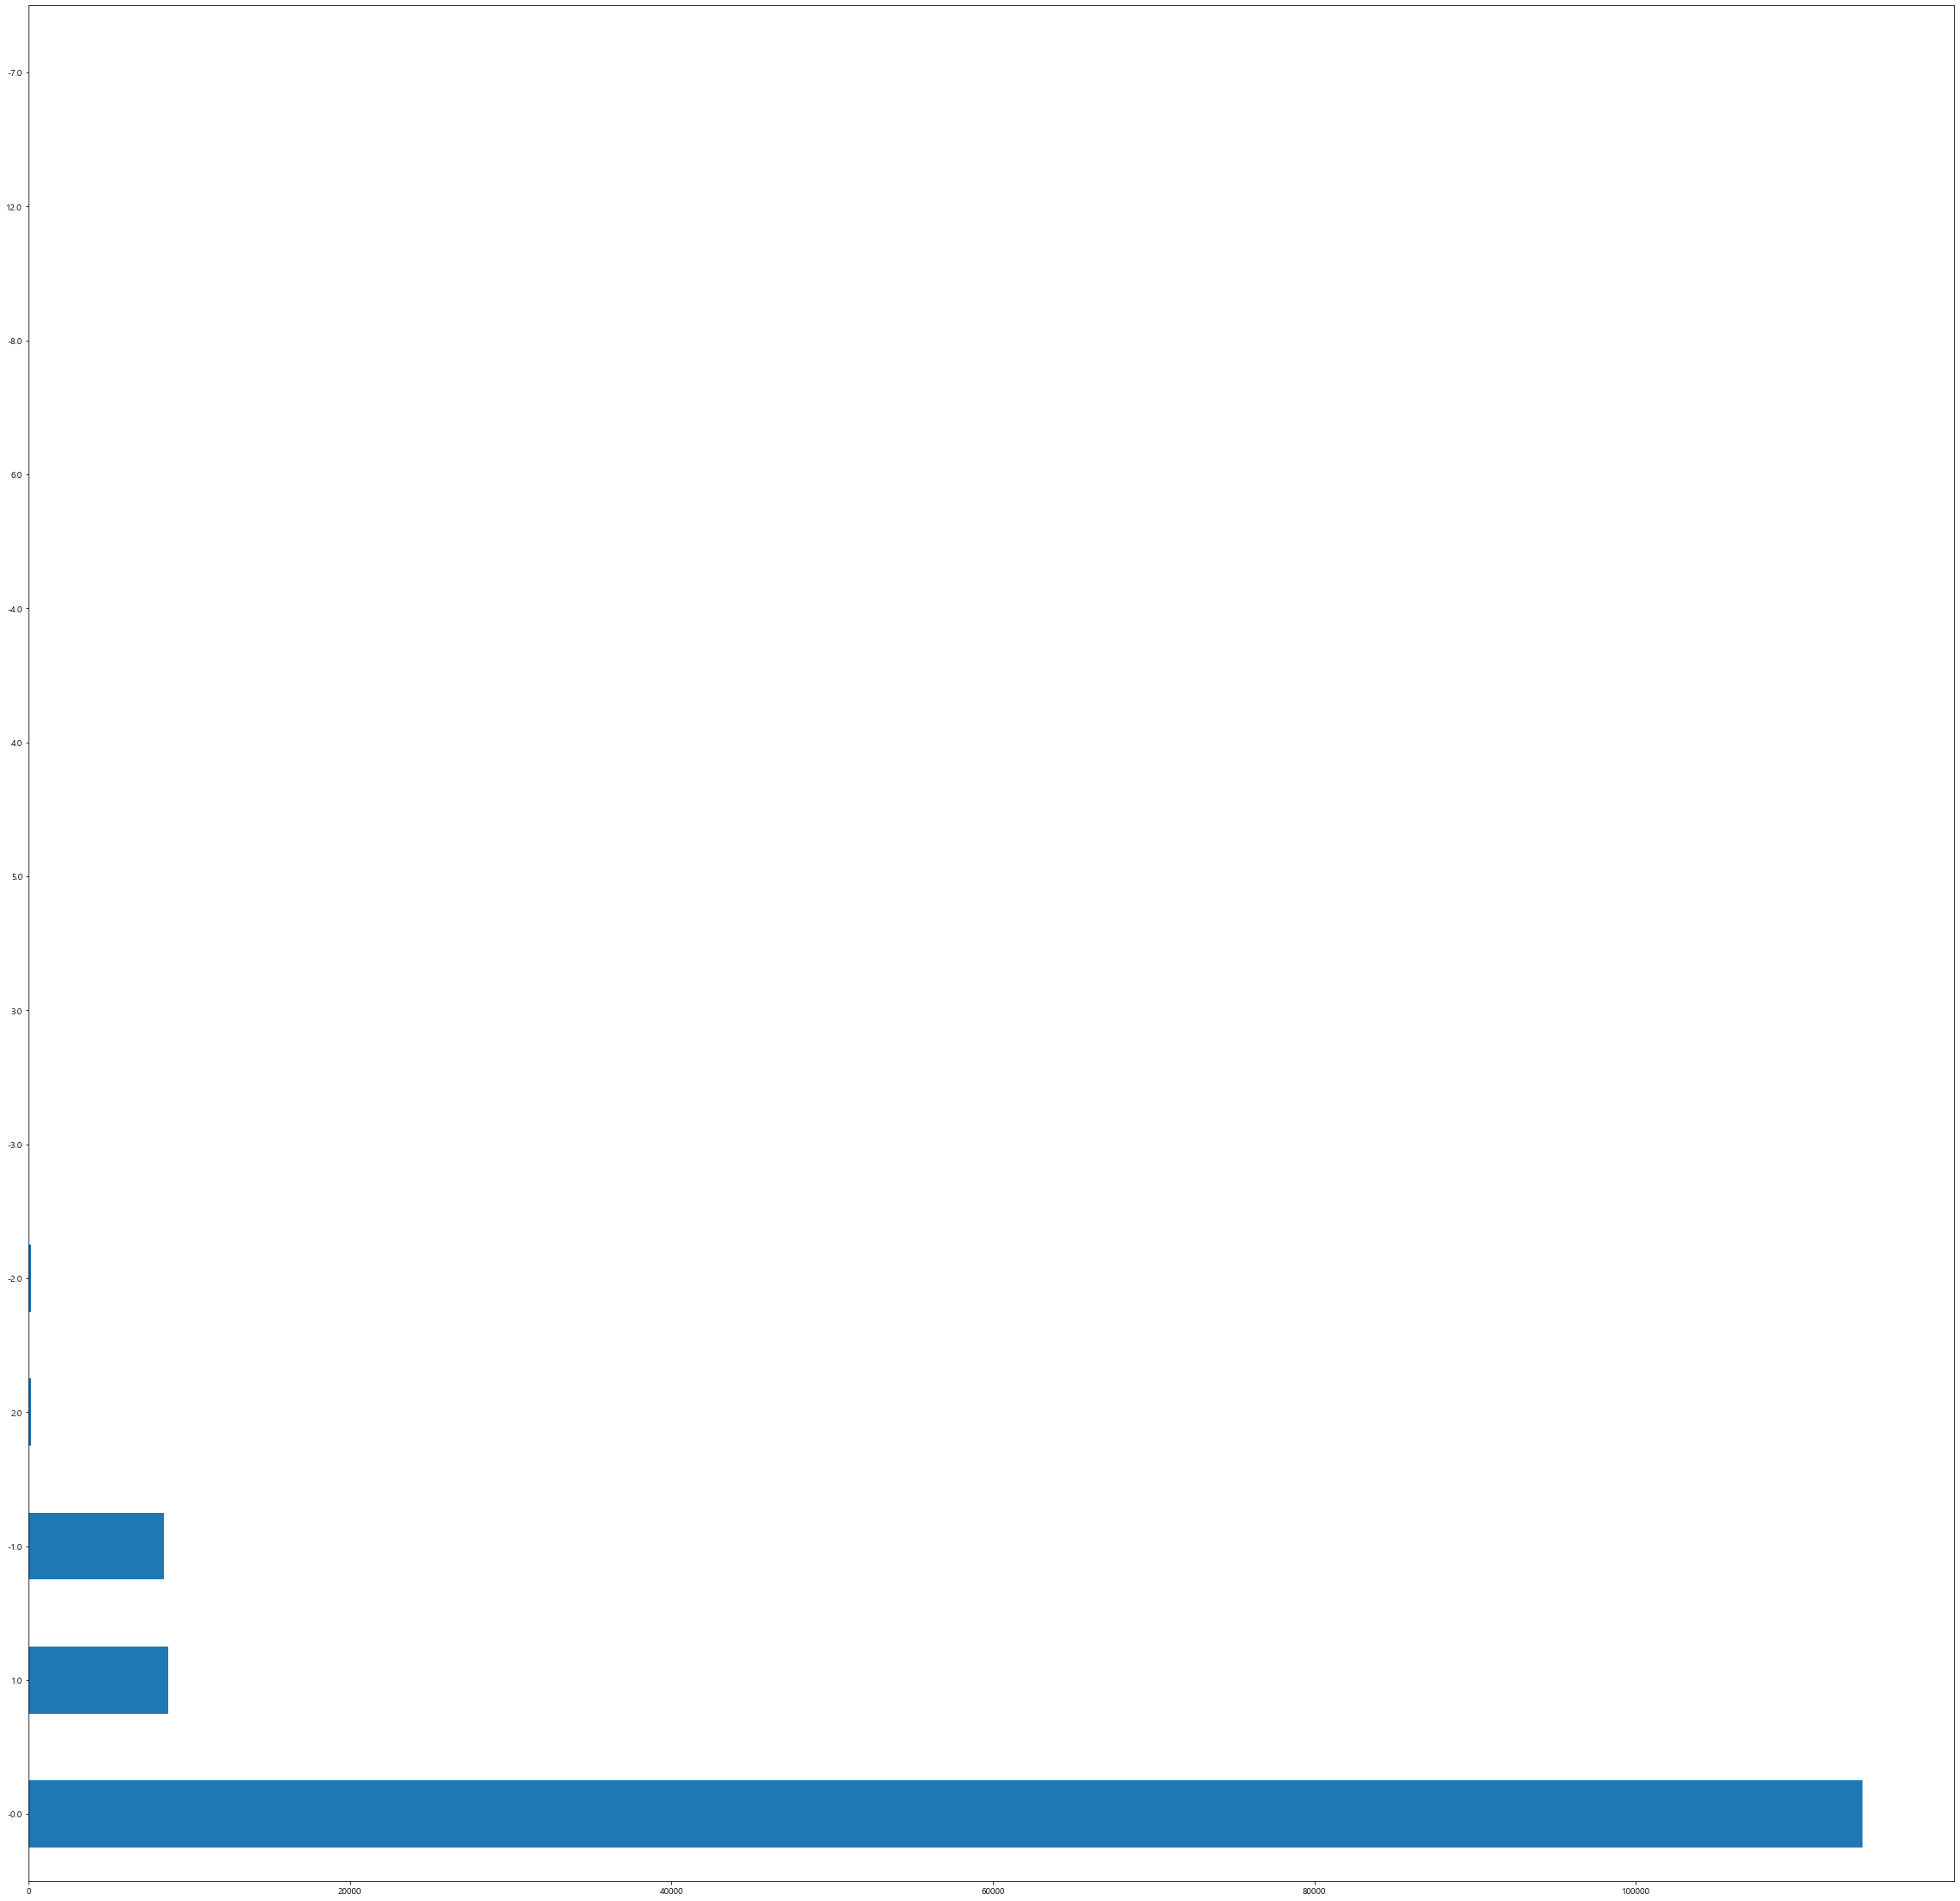

In [530]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [531]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [532]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [533]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [534]:
df_train2.round(0).value_counts()

100.0    10514
112.0     9720
88.0      9083
118.0     8498
115.0     8438
83.0      8423
84.0      8358
103.0     8336
99.0      8333
116.0     8325
117.0     8317
101.0     8317
82.0      8275
85.0      8068
97.0      7999
86.0      7718
91.0      7669
109.0     7651
81.0      7627
114.0     7521
119.0     7446
93.0      7354
107.0     7317
92.0      7214
108.0     7087
87.0      7058
94.0      6996
121.0     6822
113.0     6747
79.0      6743
106.0     6732
120.0     6698
96.0      6695
78.0      6679
98.0      6646
80.0      6644
104.0     6572
122.0     6570
102.0     6465
110.0     6148
89.0      6081
90.0      5946
77.0      5814
123.0     5751
111.0     5650
124.0     5265
76.0      5206
105.0     4761
75.0      4727
95.0      4665
74.0      4279
72.0      4067
71.0      3767
73.0      3672
70.0      2883
69.0      2586
68.0      2205
66.0      1963
67.0      1858
65.0      1577
64.0      1373
63.0      1210
62.0       994
61.0       955
60.0       875
59.0       690
58.0      

In [535]:
y_test2.value_counts()

100.0    3517
88.0     3173
112.0    3060
118.0    2803
82.0     2802
116.0    2789
83.0     2772
97.0     2772
84.0     2741
117.0    2734
99.0     2725
101.0    2706
103.0    2688
115.0    2679
85.0     2609
109.0    2599
91.0     2597
114.0    2570
86.0     2508
107.0    2448
108.0    2419
81.0     2414
93.0     2411
92.0     2383
119.0    2376
106.0    2369
94.0     2361
113.0    2322
80.0     2306
87.0     2291
121.0    2268
79.0     2256
104.0    2243
102.0    2239
120.0    2236
122.0    2195
96.0     2188
98.0     2180
78.0     2133
90.0     2009
89.0     1991
111.0    1983
110.0    1971
123.0    1916
77.0     1906
124.0    1771
76.0     1766
95.0     1672
105.0    1618
75.0     1565
74.0     1366
72.0     1366
73.0     1302
71.0     1264
70.0      962
69.0      889
68.0      754
66.0      650
67.0      640
65.0      513
64.0      475
63.0      452
62.0      357
61.0      338
60.0      296
59.0      218
58.0      159
57.0      140
54.0       88
55.0       87
56.0       84
53.0  

In [536]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [537]:
df_plot.columns = ['count']

In [538]:
df_plot.reset_index(inplace=True)

In [539]:
df_plot = df_plot.sort_values('index', ascending=True)

In [540]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

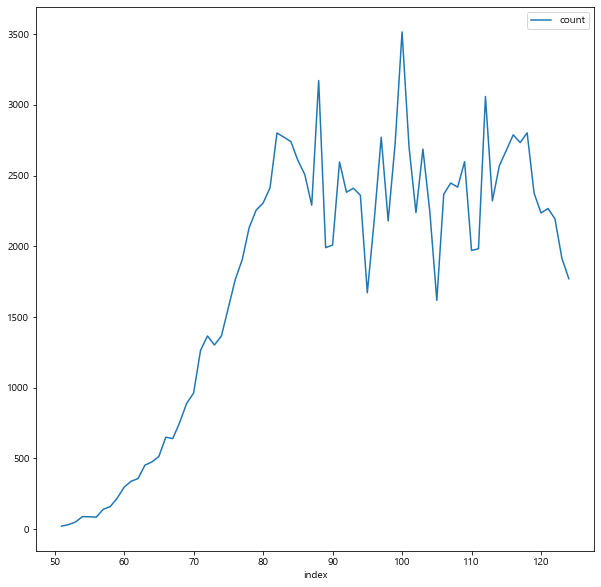

In [541]:
df_plot.plot()

In [542]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [543]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [544]:
df_test2.round(0).value_counts()

100.0    3432
112.0    3166
88.0     3045
118.0    2847
115.0    2809
101.0    2773
83.0     2766
99.0     2761
82.0     2757
116.0    2754
117.0    2712
103.0    2681
85.0     2679
84.0     2670
97.0     2656
109.0    2600
91.0     2569
114.0    2568
86.0     2509
81.0     2481
107.0    2463
92.0     2440
94.0     2414
93.0     2401
108.0    2393
87.0     2372
119.0    2335
106.0    2308
104.0    2276
113.0    2268
80.0     2263
121.0    2261
96.0     2254
79.0     2242
98.0     2242
120.0    2212
102.0    2191
122.0    2174
78.0     2157
90.0     2048
89.0     2041
110.0    2015
77.0     1954
123.0    1940
111.0    1896
124.0    1774
76.0     1709
105.0    1610
95.0     1597
75.0     1581
74.0     1395
72.0     1379
73.0     1263
71.0     1263
70.0      945
69.0      882
68.0      777
66.0      644
67.0      641
65.0      507
64.0      483
63.0      452
62.0      343
61.0      329
60.0      306
59.0      219
58.0      170
57.0      126
55.0       89
56.0       86
54.0       83
53.0  

In [545]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [546]:
df_plot2.columns = ['count']

In [547]:
df_plot2.reset_index(inplace=True)

In [548]:
df_plot2

,0,count
0,100.0,3432
1,112.0,3166
2,88.0,3045
3,118.0,2847
4,115.0,2809
5,101.0,2773
6,83.0,2766
7,99.0,2761
8,82.0,2757
9,116.0,2754


In [549]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [550]:
df_plot2.set_index(0, inplace=True)

In [551]:
df_plot2

,count
0,
51.0,21
52.0,27
53.0,56
54.0,83
55.0,89
56.0,86
57.0,126
58.0,170
59.0,219


<AxesSubplot:xlabel='0'>

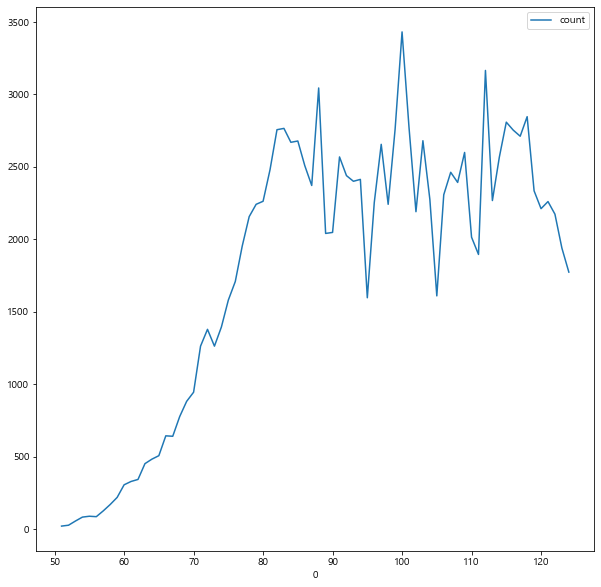

In [552]:
df_plot2.plot()

# 시각화

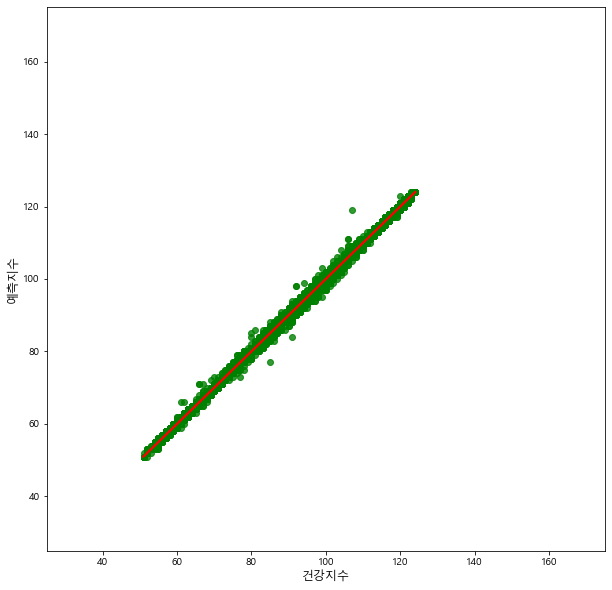

In [553]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [554]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
0,2023,48,2484053,2,35,100.64,0.71,11.84,NaN,1.0,100.00,100.00,100.00,100.0,75.25,90.0,88.0
1,2023,53,2632764,2,28,118.00,0.60,11.84,NaN,1.0,111.77,115.65,100.00,100.0,82.10,90.0,91.0
2,2024,53,2658222,2,29,130.00,0.50,10.00,NaN,1.0,149.65,175.99,198.15,100.0,131.20,90.0,116.0
3,2020,54,497669,2,30,102.73,0.71,10.00,NaN,1.0,103.20,93.70,198.93,100.0,99.21,90.0,100.0
4,2022,54,1319859,2,32,88.00,0.80,15.20,NaN,1.0,79.16,76.60,17.42,100.0,43.54,90.0,72.0


In [555]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368358 entries, 0 to 368357
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   검진년도                          368358 non-null  int32  
 1   UID                           368358 non-null  int64  
 2   CU_REC_ID                     368358 non-null  int64  
 3   SEX                           368358 non-null  int64  
 4   검진당시나이                        368358 non-null  int64  
 5   신사구체여과율 (GFR)                 368358 non-null  float64
 6   크레아티닌(Creatinine)             368358 non-null  float64
 7   요소질소 (BUN)                    368358 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null       float64
 9   상복부초음파                        368358 non-null  float64
 10  신사구체여과율 (GFR)_kde             368358 non-null  float64
 11  크레아티닌(Creatinine)_kde         368358 non-null  float64
 12  요소질소 (BUN)_kde                368358 non-nul

In [556]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target
79403,2021,196909,2495703,2,28,119.0,0.6,10.0,NaN,1.0,106.29,115.65,198.90,100.0,105.46,90.0,103.0
79404,2022,196909,2495702,2,29,118.0,0.6,10.8,NaN,1.0,95.88,114.70,104.60,100.0,79.04,90.0,90.0
79405,2023,196909,2495700,2,30,99.0,0.7,10.7,NaN,1.0,97.08,100.00,112.47,100.0,77.64,90.0,89.0
79406,2024,196909,2495697,2,31,123.0,0.6,10.7,NaN,1.0,109.97,116.66,113.39,100.0,85.26,90.0,93.0


In [557]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [558]:
len(df_pred2)

368358

In [559]:
df_pred2.reset_index(drop=True, inplace=True)

In [560]:
X_test2

,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파
40567,38,72.00,0.93,16.0,1.0
325979,29,100.64,0.56,21.0,1.0
85923,39,61.00,1.00,14.0,1.0
356136,57,108.00,0.50,10.2,1.0
142701,35,113.00,0.60,10.0,1.0
...,...,...,...,...,...
202588,43,100.64,0.60,11.5,1.0
202315,44,111.00,0.62,11.1,1.0
193618,42,116.00,0.66,13.4,1.0
286289,29,113.00,0.66,11.0,1.0


In [561]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파 (Abdominal Sono)_text',
       '상복부초음파', '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde',
       '요소질소 (BUN)_kde', '상복부초음파_kde', 'kde_mean', '상복부초음파_scaling', 'target'],
      dtype='object')

In [562]:
df_pred2[train_columns]

,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파
0,35,100.64,0.71,11.84,1.0
1,28,118.00,0.60,11.84,1.0
2,29,130.00,0.50,10.00,1.0
3,30,102.73,0.71,10.00,1.0
4,32,88.00,0.80,15.20,1.0
...,...,...,...,...,...
368353,60,99.00,0.60,11.84,1.0
368354,62,98.00,0.60,11.84,1.0
368355,56,102.00,0.60,10.00,1.0
368356,30,122.00,0.60,11.84,1.0


In [563]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [564]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [565]:
pred_data2

array([ 87.95743 ,  91.18112 , 115.69352 , ..., 100.576775,  92.95766 ,
        80.65679 ], dtype=float32)

In [566]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [567]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [568]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target,예측지수
0,2023,48,2484053,2,35,100.64,0.71,11.84,NaN,1.0,100.00,100.00,100.00,100.0,75.25,90.0,88.0,87.957428
1,2023,53,2632764,2,28,118.00,0.60,11.84,NaN,1.0,111.77,115.65,100.00,100.0,82.10,90.0,91.0,91.181122
2,2024,53,2658222,2,29,130.00,0.50,10.00,NaN,1.0,149.65,175.99,198.15,100.0,131.20,90.0,116.0,115.693520
3,2020,54,497669,2,30,102.73,0.71,10.00,NaN,1.0,103.20,93.70,198.93,100.0,99.21,90.0,100.0,99.281715
4,2022,54,1319859,2,32,88.00,0.80,15.20,NaN,1.0,79.16,76.60,17.42,100.0,43.54,90.0,72.0,71.631264
5,2023,54,2039511,2,33,102.00,0.70,10.00,NaN,1.0,103.94,100.00,198.49,100.0,100.86,90.0,100.0,100.120720
6,2024,54,2750990,2,34,96.19,0.80,10.00,NaN,1.0,87.62,72.75,199.24,100.0,90.15,90.0,95.0,95.191216
7,2019,56,1605927,2,30,89.00,0.80,11.84,NaN,1.0,84.17,70.84,100.00,100.0,64.00,90.0,82.0,81.989166
8,2020,56,1605928,2,31,143.00,0.50,11.84,NaN,1.0,182.66,179.44,100.00,100.0,115.78,90.0,108.0,108.219147
9,2021,56,1605929,2,32,142.00,0.50,11.84,NaN,1.0,185.79,176.17,100.00,100.0,115.74,90.0,108.0,107.886978


## 예측지수 성능평가

In [569]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.27811253728239993

# target으로 나이 계산

In [570]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [571]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target,예측지수,예측나이
0,2023,48,2484053,2,35,100.64,0.71,11.84,NaN,1.0,100.00,100.00,100.00,100.0,75.25,90.0,88.0,87.957428,37.41
1,2023,53,2632764,2,28,118.00,0.60,11.84,NaN,1.0,111.77,115.65,100.00,100.0,82.10,90.0,91.0,91.181122,29.76
2,2024,53,2658222,2,29,130.00,0.50,10.00,NaN,1.0,149.65,175.99,198.15,100.0,131.20,90.0,116.0,115.693520,25.86
3,2020,54,497669,2,30,102.73,0.71,10.00,NaN,1.0,103.20,93.70,198.93,100.0,99.21,90.0,100.0,99.281715,30.14
4,2022,54,1319859,2,32,88.00,0.80,15.20,NaN,1.0,79.16,76.60,17.42,100.0,43.54,90.0,72.0,71.631264,37.67
5,2023,54,2039511,2,33,102.00,0.70,10.00,NaN,1.0,103.94,100.00,198.49,100.0,100.86,90.0,100.0,100.120720,32.98
6,2024,54,2750990,2,34,96.19,0.80,10.00,NaN,1.0,87.62,72.75,199.24,100.0,90.15,90.0,95.0,95.191216,34.96
7,2019,56,1605927,2,30,89.00,0.80,11.84,NaN,1.0,84.17,70.84,100.00,100.0,64.00,90.0,82.0,81.989166,33.60
8,2020,56,1605928,2,31,143.00,0.50,11.84,NaN,1.0,182.66,179.44,100.00,100.0,115.78,90.0,108.0,108.219147,29.36
9,2021,56,1605929,2,32,142.00,0.50,11.84,NaN,1.0,185.79,176.17,100.00,100.0,115.74,90.0,108.0,107.886978,30.42


## 예측나이 성능평가

In [572]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.7567391776478303

# 최종 산출

In [573]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,상복부초음파_kde,kde_mean,상복부초음파_scaling,target,예측지수,예측나이
0,2023,48,2484053,2,35,100.64,0.71,11.84,NaN,1.0,100.00,100.00,100.00,100.0,75.25,90.0,88.0,87.957428,37.41
1,2023,53,2632764,2,28,118.00,0.60,11.84,NaN,1.0,111.77,115.65,100.00,100.0,82.10,90.0,91.0,91.181122,29.76
2,2024,53,2658222,2,29,130.00,0.50,10.00,NaN,1.0,149.65,175.99,198.15,100.0,131.20,90.0,116.0,115.693520,25.86
3,2020,54,497669,2,30,102.73,0.71,10.00,NaN,1.0,103.20,93.70,198.93,100.0,99.21,90.0,100.0,99.281715,30.14
4,2022,54,1319859,2,32,88.00,0.80,15.20,NaN,1.0,79.16,76.60,17.42,100.0,43.54,90.0,72.0,71.631264,37.67


# DataMart csv

In [574]:
df_copy = df.copy()

In [575]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,7282,2520,1,42,NaN,1.13,12.0,NaN,NaN
1,2010,7490,3638,1,39,NaN,1.10,14.0,NaN,NaN
2,2010,7915,3997,1,36,NaN,1.10,14.0,NaN,NaN
3,2010,8056,4745,1,42,108.0,0.80,8.0,NaN,NaN
4,2010,8457,3929,1,38,NaN,1.20,12.0,NaN,NaN


In [576]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   검진년도                          1213899 non-null  int32  
 1   UID                           1213899 non-null  int64  
 2   CU_REC_ID                     1213899 non-null  int64  
 3   SEX                           1213899 non-null  int64  
 4   검진당시나이                        1213899 non-null  int64  
 5   신사구체여과율 (GFR)                 1030102 non-null  float64
 6   크레아티닌(Creatinine)             1205944 non-null  float64
 7   요소질소 (BUN)                    1112156 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null        float64
 9   상복부초음파                        104081 non-null   float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 88.0 MB


In [577]:
minimums

[43.0, 0.2499999999999999, 3.8500000000000023, nan, -5.0]

In [578]:
maximums

[147.0, 1.4500000000000002, 21.049999999999997, nan, 11.0]

In [579]:
train_columns

['검진당시나이', '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [580]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [581]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [582]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [583]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
10,2010,15894,2533,2,29,NaN,0.6,8.3,NaN,NaN
22,2010,42223,1364,2,24,NaN,0.6,8.9,NaN,NaN
37,2011,364096,6645,2,32,NaN,0.9,11.0,NaN,NaN
45,2010,120518,3595,2,30,NaN,0.9,14.5,NaN,NaN
63,2011,698706,6600,2,36,NaN,0.9,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [584]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파']

In [585]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [586]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [587]:
len(df_woman_csv)

446397

## fillna

In [588]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파 (Abdominal Sono)_text',
       '상복부초음파', '신사구체여과율 (GFR)_kde', '크레아티닌(Creatinine)_kde',
       '요소질소 (BUN)_kde', '상복부초음파_kde', 'kde_mean', '상복부초음파_scaling', 'target'],
      dtype='object')

In [589]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '상복부초음파 (Abdominal Sono)_text',
       '상복부초음파'],
      dtype='object')

In [590]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

In [591]:
screening = 10

In [592]:
scr_col = '요소질소 (BUN)'

In [593]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파
0,2010,15894,2533,2,29,100.62,0.6,8.3,NaN,1.1
1,2010,42223,1364,2,24,100.62,0.6,8.9,NaN,1.1
7,2010,167053,3087,2,26,100.62,0.8,9.7,NaN,1.1
78,2010,336676,1469,2,27,100.62,0.8,7.5,NaN,1.1
83,2019,13595,2831055,2,36,117.00,0.6,8.2,NaN,5.0


In [594]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

135020

In [595]:
df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [596]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파


In [597]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [598]:
len(df_woman_csv)

446397

## 모델 예측

In [599]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [600]:
pred_data2 = pred_data2.round(0)

In [601]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [602]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수
0,2010,15894,2533,2,29,100.62,0.6,10.00,NaN,1.1,102.0
1,2010,42223,1364,2,24,100.62,0.6,10.00,NaN,1.1,100.0
2,2011,364096,6645,2,32,100.62,0.9,11.00,NaN,1.1,78.0
3,2010,120518,3595,2,30,100.62,0.9,14.50,NaN,1.1,69.0
4,2011,698706,6600,2,36,100.62,0.9,11.85,NaN,1.1,76.0


### 성능 평가

In [603]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [604]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [605]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [606]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.7978982833666


In [607]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.8372916483606694

In [608]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
0,2010,15894,2533,2,29,100.62,0.6,10.00,NaN,1.1,102.0,28.6
1,2010,42223,1364,2,24,100.62,0.6,10.00,NaN,1.1,100.0,24.0
2,2011,364096,6645,2,32,100.62,0.9,11.00,NaN,1.1,78.0,36.4
3,2010,120518,3595,2,30,100.62,0.9,14.50,NaN,1.1,69.0,36.2
4,2011,698706,6600,2,36,100.62,0.9,11.85,NaN,1.1,76.0,40.8


In [609]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446397 entries, 0 to 446396
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   검진년도                          446397 non-null  int32  
 1   UID                           446397 non-null  int64  
 2   CU_REC_ID                     446397 non-null  int64  
 3   SEX                           446397 non-null  int64  
 4   검진당시나이                        446397 non-null  int64  
 5   신사구체여과율 (GFR)                 446397 non-null  float64
 6   크레아티닌(Creatinine)             446397 non-null  float64
 7   요소질소 (BUN)                    446397 non-null  float64
 8   상복부초음파 (Abdominal Sono)_text  0 non-null       float64
 9   상복부초음파                        446397 non-null  float64
 10  예측지수                          446397 non-null  float32
 11  예측나이                          446397 non-null  float64
dtypes: float32(1), float64(6), int32(1), int64(4

# 최종 UID별 확인

In [610]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
126613,2021,261581,806568,2,50,106.0,0.6,10.0,NaN,1.1,104.0,49.2
126622,2021,261581,2243879,2,50,106.0,0.6,10.0,NaN,1.1,104.0,49.2
126623,2021,261581,2418909,2,50,106.0,0.6,10.0,NaN,1.1,104.0,49.2
126624,2021,261581,2418910,2,50,106.0,0.6,10.0,NaN,1.1,104.0,49.2
191801,2022,261581,751339,2,51,105.0,0.6,15.6,NaN,1.1,85.0,54.0
191804,2022,261581,2243878,2,51,105.0,0.6,15.6,NaN,1.1,85.0,54.0
286811,2023,261581,1519764,2,52,105.0,0.6,10.0,NaN,1.1,105.0,51.0
286812,2023,261581,2243877,2,52,105.0,0.6,10.0,NaN,1.1,105.0,51.0
411643,2024,261581,2418911,2,53,104.0,0.6,12.5,NaN,1.1,96.0,53.8


In [611]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
66890,2022,477944,956268,2,31,117.0,0.6,11.5,NaN,1.1,84.0,34.2
224789,2022,477944,2212776,2,31,117.0,0.6,11.5,NaN,1.1,84.0,34.2
332923,2023,477944,1454346,2,32,97.0,0.7,13.5,NaN,1.1,77.0,36.6
332924,2023,477944,2212775,2,32,97.0,0.7,13.5,NaN,1.1,77.0,36.6
424068,2024,477944,2362855,2,33,84.0,0.9,13.7,NaN,1.1,67.0,39.6


In [612]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),상복부초음파 (Abdominal Sono)_text,상복부초음파,예측지수,예측나이
358945,2023,896916,1459636,2,28,119.0,0.6,14.0,NaN,1.1,82.0,31.6
358934,2023,896916,1842092,2,28,119.0,0.6,14.0,NaN,1.1,82.0,31.6
358946,2023,896916,2031853,2,28,119.0,0.6,14.0,NaN,1.1,82.0,31.6
358947,2023,896916,2253054,2,28,119.0,0.6,14.0,NaN,1.1,82.0,31.6
352915,2023,896916,2257188,2,28,119.0,0.6,14.0,NaN,1.1,82.0,31.6
435016,2024,896916,2253058,2,29,124.0,0.6,10.7,NaN,1.1,93.0,30.4


# 최종 CSV 병합 Extract

In [613]:
len(df_man_csv)

761669

In [614]:
len(df_woman_csv)

446397

In [615]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [616]:
df_csv.to_csv(csv_path)